# Bombardeos de los Aliados,
### y de cómo entender mejor la Segunda Guerra Mundial a través de ellos.
By Fernando Bielza González

## >Importa librerías necesarias

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins #<--- Para lo del minimapa

import copy #<--- todo
import random
import statistics #<--- Para las medianas

from geopy.distance import geodesic #<--- Para las distancias


## >Obtener el DataFrame THOR y una copia (DataFrame General)

In [2]:
df = pd.read_csv('Datasets/thor_wwii.csv')
df

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
0,03/30/1941,ETO,GREAT BRITAIN,RAF,84 SQDN,BLENHEIM,10.0,NaN,NaN,NaN,NaN,ALBANIA,ELBASAN,41.100000,20.070000,0.0,0.0,0.0,0.0
1,11/24/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,DURAZZO,41.320000,19.450000,0.0,0.0,0.0,0.0
2,12/04/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,TEPELENE,40.300000,20.020000,0.0,0.0,0.0,0.0
3,12/31/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
4,01/06/1941,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,08/01/1945,PTO,USA,20 AF,73 BW,B29,99.0,NaN,NaN,NaN,NaN,JAPAN,TOYAMA,36.700000,137.216667,0.0,999.0,0.0,999.0
178277,07/22/1942,MTO,GREAT BRITAIN,RAF,NaN,BLENHEIM,NaN,NaN,NaN,NaN,NaN,EGYPT,MERSA MATRUH,31.330000,27.200000,0.0,0.0,0.0,1300.0
178278,08/17/1940,EAST AFRICA,GREAT BRITAIN,RAF,47 SQDN,WELLESLEY,6.0,ERKOWIT,SUDAN,18.75,37.0,SUDAN,KASSALA,15.450000,36.400000,4750.0,0.0,0.0,4750.0
178279,08/06/1945,PTO,USA,20 AF,509 CG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,HIROSHIMA,34.400000,132.466667,15000.0,0.0,0.0,15000.0


In [3]:
df_total=copy.copy(df)

## >Arreglar DataFrame General

### +Arreglar datos NaN de interés

In [4]:
df_total["THEATER"]=df_total["THEATER"].fillna("UNKNOWN THEATER")
df_total["COUNTRY_FLYING_MISSION"]=df_total["COUNTRY_FLYING_MISSION"].fillna("UNKNOWN COUNTRY")
df_total["NAF"]=df_total["NAF"].fillna("UNKNOWN NAF")
df_total["UNIT_ID"]=df_total["UNIT_ID"].fillna("UNKNOWN UNIT")
df_total["AIRCRAFT_NAME"]=df_total["AIRCRAFT_NAME"].fillna("UNKNOWN NAME")

df_total["AC_ATTACKING"]=df_total["AC_ATTACKING"].fillna(0.0)

df_total["TGT_COUNTRY"]=df_total["TGT_COUNTRY"].fillna("UNKNOWN COUNTRY")
df_total["TGT_LOCATION"]=df_total["TGT_LOCATION"].fillna("UNKNOWN LOCATION")      #<---¿UNIDENTIFIED?


df_total

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
0,03/30/1941,ETO,GREAT BRITAIN,RAF,84 SQDN,BLENHEIM,10.0,NaN,NaN,NaN,NaN,ALBANIA,ELBASAN,41.100000,20.070000,0.0,0.0,0.0,0.0
1,11/24/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,DURAZZO,41.320000,19.450000,0.0,0.0,0.0,0.0
2,12/04/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,TEPELENE,40.300000,20.020000,0.0,0.0,0.0,0.0
3,12/31/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
4,01/06/1941,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,08/01/1945,PTO,USA,20 AF,73 BW,B29,99.0,NaN,NaN,NaN,NaN,JAPAN,TOYAMA,36.700000,137.216667,0.0,999.0,0.0,999.0
178277,07/22/1942,MTO,GREAT BRITAIN,RAF,UNKNOWN UNIT,BLENHEIM,0.0,NaN,NaN,NaN,NaN,EGYPT,MERSA MATRUH,31.330000,27.200000,0.0,0.0,0.0,1300.0
178278,08/17/1940,EAST AFRICA,GREAT BRITAIN,RAF,47 SQDN,WELLESLEY,6.0,ERKOWIT,SUDAN,18.75,37.0,SUDAN,KASSALA,15.450000,36.400000,4750.0,0.0,0.0,4750.0
178279,08/06/1945,PTO,USA,20 AF,509 CG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,HIROSHIMA,34.400000,132.466667,15000.0,0.0,0.0,15000.0


### +Arreglar ausencia de coordenadas en las operaciones sobre Madagascar

In [5]:
#Obtener el índice de todas las filas cuyo país registrado sea Madagascar:
x=df_total[df_total["TGT_COUNTRY"]=="MADAGASCAR"]
lista_Madagascar=x.index.tolist()

#Obtener un nuevo DataFrame con las filas de Madagascar y añadirle las coordenadas de forma manual:
a=df_total[df_total["TGT_LOCATION"]=="DIEGO SUAREZ BAY"]
a['TGT_LATITUDE'] = a['TGT_LATITUDE'].fillna(-12.1350)
a['TGT_LONGITUDE'] = a['TGT_LONGITUDE'].fillna(49.1734)

b=df_total[df_total["TGT_LOCATION"]=="SW OF DIEGO SUAREZ BAY"]
b['TGT_LATITUDE'] = b['TGT_LATITUDE'].fillna(-12.1350)
b['TGT_LONGITUDE'] = b['TGT_LONGITUDE'].fillna(49.1734)

c=df_total[df_total["TGT_LOCATION"]=="BETSIBOKA BRDGE TO TANANARIVE"]
c['TGT_LATITUDE'] = c['TGT_LATITUDE'].fillna(-16.9380)
c['TGT_LONGITUDE'] = c['TGT_LONGITUDE'].fillna(46.9512)

d=df_total[df_total["TGT_LOCATION"]=="BETSIBOKA BRIDGE"]
d['TGT_LATITUDE'] = d['TGT_LATITUDE'].fillna(-16.9380)
d['TGT_LONGITUDE'] = d['TGT_LONGITUDE'].fillna(46.9512)

e=df_total[df_total["TGT_LOCATION"]=="3MI N OF BEHENJY ON TANANARIVE-ANTISIRABE RD"]
e['TGT_LATITUDE'] = e['TGT_LATITUDE'].fillna(-16.9380)
e['TGT_LONGITUDE'] = e['TGT_LONGITUDE'].fillna(46.9512)

f=df_total[df_total["TGT_LOCATION"]=="IHOSY"]
f['TGT_LATITUDE'] = f['TGT_LATITUDE'].fillna(-22.2400)
f['TGT_LONGITUDE'] = f['TGT_LONGITUDE'].fillna(46.0701)

g=df_total[df_total["TGT_LOCATION"]=="1 MI SW OF IHOSY"]
g['TGT_LATITUDE'] = g['TGT_LATITUDE'].fillna(-22.2400)
g['TGT_LONGITUDE'] = g['TGT_LONGITUDE'].fillna(46.0701)

h=df_total[df_total["TGT_LOCATION"]=="HILLS S OF AMBOSITRA"]
h['TGT_LATITUDE'] = h['TGT_LATITUDE'].fillna(-20.3258) 
h['TGT_LONGITUDE'] = h['TGT_LONGITUDE'].fillna(47.1521)

ii=df_total[df_total["TGT_LOCATION"]=="N OF ALAKAMISY"]
ii['TGT_LATITUDE'] = ii['TGT_LATITUDE'].fillna(-19.53)  
ii['TGT_LONGITUDE'] = ii['TGT_LONGITUDE'].fillna(46.54)

j=df_total[df_total["TGT_LOCATION"]=="ARRACHART AIRFIELD"]
j['TGT_LATITUDE'] = j['TGT_LATITUDE'].fillna(-12.2057)
j['TGT_LONGITUDE'] = j['TGT_LONGITUDE'].fillna(49.1730)

k=df_total[df_total["TGT_LOCATION"]=="COL DE BONNE NOUVELLE"]
k['TGT_LATITUDE'] = k['TGT_LATITUDE'].fillna(-18.5619)
k['TGT_LONGITUDE'] = k['TGT_LONGITUDE'].fillna(47.3117)

#Este caso no se trata de coordenadas ausentes, sino de una erróena asignación de país:
l=df_total[df_total["TGT_LOCATION"]=="BALDENEY SEE"]
l["TGT_COUNTRY"] = l["TGT_COUNTRY"].replace(["MADAGASCAR"], "GERMANY")

##Este último se trata de coordenadas objetivamente erradas (se salen del mapamundis):
m=df_total[df_total["TGT_LOCATION"]=="PAUILLAC"]
m['TGT_LATITUDE'] = m['TGT_LATITUDE'].replace([100.65], 45.1200)
m['TGT_LONGITUDE'] = m['TGT_LONGITUDE'].replace([1000.65], -0.748611)

#Añadimos esto último (que nada tiene que ver con Madagascar, pero hay que rectificarlos igualmente):

lista_Madagascar_2=m.index.tolist()
for i in lista_Madagascar_2:
    lista_Madagascar.append(i)

#Concatenar todas las filas en un único DataFrame:
df_total_Madagascar = pd.concat([a, b, c, d, e, f, g, h, ii, j, k, l, m])#<---Por algún motivo, si uso "i" en vez de "ii" me da error pues lo convierte a lista y no a Serie.

#Expulsar del DataFrame General todas las operaciones sobre Madagascar:

for i in lista_Madagascar:
    df_total=df_total.drop([i])

#Concatenar el DataFrame General con el DataFrame de las operaciones sobre Madagascar (ya con las coordenadas añadidas):
df_total=pd.concat([df_total, df_total_Madagascar])

C:\Users\ferbi\AppData\Local\Temp/ipykernel_87072/1448073817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['TGT_LATITUDE'] = a['TGT_LATITUDE'].fillna(-12.1350)
C:\Users\ferbi\AppData\Local\Temp/ipykernel_87072/1448073817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['TGT_LONGITUDE'] = a['TGT_LONGITUDE'].fillna(49.1734)
C:\Users\ferbi\AppData\Local\Temp/ipykernel_87072/1448073817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### +Arreglar cronología y eliminar fechas sobrantes (todas las posteriores al 2 de septiembre de 1945)

In [6]:
#Obtener DataFrame General ordenado cronológicamente:
df_total["MSNDATE"]=pd.to_datetime(df_total["MSNDATE"])
df_total=df_total.sort_values(by='MSNDATE')

#Obtener DataFrame con las fechas posteriores al 2 de septiembre de 1945 de forma manual:
df_total_END=df_total[-53:]

#Eliminar fechas sobrantes del DataFram General:
df_total=df_total[:-54]
#(hay 178.228 (-53) operaciones)

df_total

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
3990,1939-09-03,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,10.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""HAMBURG, BREMEN, RUHR""",53.563056,9.967222,0.0,0.0,0.0,0.0
3991,1939-09-04,ETO,GREAT BRITAIN,RAF,139 SQ,BLENHEIM,10.0,WYTON,ENGLAND,52.35694,-0.10777,GERMANY,WILHELMSHAVEN,53.500000,8.050000,0.0,0.0,0.0,0.0
3994,1939-09-04,ETO,GREAT BRITAIN,RAF,9 & 149 SQ,WELLINGTON,9.0,RAF HONINGTON,ENGLAND,52.34277,0.77305,GERMANY,BRUNSBUTTEL,53.895040,9.104836,0.0,0.0,0.0,0.0
4004,1939-09-04,ETO,GREAT BRITAIN,RAF,51 & 58 SQ,WHITLEY,6.0,LECONFIELD,ENGLAND,53.87750,-0.43555,GERMANY,RUHR,52.366667,9.716667,0.0,0.0,0.0,0.0
4014,1939-09-05,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,4.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""MAINZ, DARMSTADT, MANNHEIM, FRANKFURT""",48.766667,9.150000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64086,1945-08-14,PTO,USA,20 AF,73 BW,B29,0.0,NaN,NaN,NaN,NaN,JAPAN,KOIZUMI,36.266667,136.433333,0.0,3.0,0.0,3.0
176410,1945-08-14,PTO,USA,20 AF,314 BW,B29,0.0,NaN,NaN,NaN,NaN,JAPAN,KUMAGAYA,36.133333,139.400000,0.0,218.0,0.0,218.0
176594,1945-08-14,PTO,USA,20 AF,314 BW,B29,0.0,NaN,NaN,NaN,NaN,JAPAN,ISESAKI,36.300000,139.200000,0.0,247.0,0.0,247.0
123530,1945-08-14,PTO,USA,20 AF,504 BG,B29,7.0,NaN,NaN,NaN,NaN,JAPAN MINING,NANAO,37.050000,136.966667,24.0,0.0,0.0,24.0


### +Arreglar índice, cambiándolo por las fechas

In [7]:
df_total.set_index('MSNDATE',inplace=True)

## >Funiones

### +Función para localizar por días [1]

In [8]:
def fun_fechas (df_total_dias, *fechas):
    #df_total_dias=df_total_dias.set_index('MSNDATE')
    lista=[]
    for i in fechas:
        lista.append(i)
    if len(lista) < 2:
        lista.append(lista[0])
    return df_total_dias[lista[0]:lista[1]]

### +Función para obtener número de operaciones [1]

In [9]:
#Función para cronología [muestra solo Fecha]:
def fun_crono (df_total_year, x=5, y=5, titulo="Bombardeos Aliados en la Segunda Guerra Mundial", style=0, kind=1):#<---¿¿¿CONTROLAMOS CUANTAS TONELADAS DE EXPLOSIVOS???
    df_crono=df_total_year.drop(['COUNTRY_FLYING_MISSION', 'TGT_COUNTRY', 'TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'AIRCRAFT_NAME', 'TGT_LATITUDE', 'TGT_LONGITUDE', 'TOTAL_TONS'], axis=1)
    lista_crono=[]
    for (index, row) in df_crono.iterrows():
        fecha=index
        lista_crono.append(fecha)
    df_fechas = pd.Series(lista_crono, index = lista_crono)
    titulo_1=limpiar_horas(lista_crono[0])
    titulo_2=limpiar_horas(lista_crono[-1])
    
    plt.style.use(estilo (style))
    return df_fechas.groupby([df_fechas.dt.year, df_fechas.dt.month]).count().plot(kind=(tipo(kind)), title=titulo, xlabel=f"De {titulo_1} a {titulo_2}", ylabel="Nº Operaciones", figsize=(x,y))

### +Función para geolocalizar [1]

#### · Función de geolocalización

In [10]:
def fun_gps(df_total_year, x=30, y=55, z=2.4, tons=0, top_tons=20000, tile=0, reverse=False, minimapa=False, escala=False):#, teatro="0"):
    """
Las coordenadas para geolocalizar Teatros de Operaciones serían:
    -Europa: x=19, y=52, z=5.4
    -Pacífico: x=150, y=25, z=4.3
    -Mediterráneo: x=16, y=40, z=5.48
    -Extremo Oriente: x=117, y=27, z=4.5
    -África Oriental: x=43, y=10, z=6
    -Madagascar: x=48, y=-19, z=6
    

Las NUEVAS coordenadas para geolocalizar Teatros de Operaciones serían:
    -Europa: x=19, y=52, z=4.8
    -Pacífico: x=150, y=25, z=4.3
    -Mediterráneo: x=16, y=40, z=5.48
    -Extremo Oriente: x=117, y=27, z=4.5
    -África Oriental: x=43, y=10, z=6
    -Madagascar: x=48, y=-19, z=6


    if teatro != "0":
        x, y, z=continente(teatro, x, y, z)
    else:
        x=30
        y=55
        z=2.4

    """
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'UNIT_ID'], axis=1)
    df_gps=df_gps.dropna()
    
    if escala is True:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)), width=500, height=300, control_scale=True)
    else:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)))
    
    for (index, row) in df_gps.iterrows():
        if row.loc['TOTAL_TONS'] >= tons and row.loc['TOTAL_TONS'] <= top_tons:
            fecha=limpiar_horas(index)
            referencia="Fecha: "+fecha+" / "+"Localización: "+row.loc['TGT_LOCATION']+" / "+"Daño: "+str(row.loc['TOTAL_TONS'])
            atacante="Modelo: "+row.loc['AIRCRAFT_NAME']+" / "+"Unidades: "+str(int(row.loc['AC_ATTACKING']))+" / "+"Grupo: "+row.loc['NAF']+" ("+row.loc['COUNTRY_FLYING_MISSION']+")"
            x=colorear(row.loc['TOTAL_TONS'])
            y=simbolo(row.loc['COUNTRY_FLYING_MISSION'])
            m=(row.loc['TGT_LATITUDE'])+(round(random.uniform(-0.05, 0.05), 6))
            n=(row.loc['TGT_LONGITUDE'])+(round(random.uniform(-0.05, 0.05), 6))
            if reverse is True:
                referencia_x=atacante
                atacante=referencia
                referencia=referencia_x
            folium.Marker(location = [m, n], popup = atacante, tooltip = referencia, icon=folium.Icon(color=x, icon=y),).add_to(r)
        else:
            pass
    if minimapa is True:
        r.add_child(plugins.MiniMap(toggle_display = True))
    if escala is True:
        from branca.element import Figure
        fig = Figure(width=500, height=300)
        fig.add_child(r)
        return fig
    return r

In [11]:
def fun_gps2(df_total_year, x=30, y=55, z=2.4, tons=0, top_tons=20000, tile=5, minimapa=False, multiplicador=5, escala=False):#, teatro="0"):
    """
Las coordenadas para geolocalizar Teatros de Operaciones serían:
    -Europa: x=19, y=52, z=5.4
    -Pacífico: x=150, y=25, z=4.3
    -Mediterráneo: x=16, y=40, z=5.48
    -Extremo Oriente: x=117, y=27, z=4.5
    -África Oriental: x=43, y=10, z=6
    -Madagascar: x=48, y=-19, z=6
    

    if teatro != "0":
        x, y, z=continente(teatro, x, y, z)
    else:
        x=30
        y=55
        z=2.4

    """
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'UNIT_ID'], axis=1)
    df_gps=df_gps.dropna()
    
    if escala is True:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)), width=500, height=300, control_scale=True)
    else:
        r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)))
    
    for (index, row) in df_gps.iterrows():
        if row.loc['TOTAL_TONS'] >= tons and row.loc['TOTAL_TONS'] <= top_tons:
            fecha=limpiar_horas(index)
            referencia="Fecha: "+fecha+" / "+"Localización: "+row.loc['TGT_LOCATION']+" / "+"Daño: "+str(row.loc['TOTAL_TONS'])
            x=colorear(row.loc['TOTAL_TONS'])
            y=simbolo(row.loc['COUNTRY_FLYING_MISSION'])
            m=(row.loc['TGT_LATITUDE'])+(round(random.uniform(-0.015, 0.015), 6))
            n=(row.loc['TGT_LONGITUDE'])+(round(random.uniform(-0.015, 0.015), 6))
            total_tons=((row.loc['TOTAL_TONS'])+1)*multiplicador
            folium.Circle(radius=total_tons, location=[m, n], tooltip = referencia, color=x, fill=True, ).add_to(r)
    if minimapa is True:
        r.add_child(plugins.MiniMap(toggle_display = True))
    if escala is True:
        from branca.element import Figure
        fig = Figure(width=500, height=300)
        fig.add_child(r)
        return fig
    return r

In [12]:
def fun_gps3(df_total_year, x=30, y=55, z=2.4, tons=0, top_tons=20000, tile=0, reverse=False, minimapa=False):#, teatro="0"):
    """
Las coordenadas para geolocalizar Teatros de Operaciones serían:
    -Europa: x=19, y=52, z=5.4
    -Pacífico: x=150, y=25, z=4.3
    -Mediterráneo: x=16, y=40, z=5.48
    -Extremo Oriente: x=117, y=27, z=4.5
    -África Oriental: x=43, y=10, z=6
    -Madagascar: x=48, y=-19, z=6
    

    if teatro != "0":
        x, y, z=continente(teatro, x, y, z)
    else:
        x=30
        y=55
        z=2.4

    """
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'UNIT_ID'], axis=1)
    df_gps=df_gps.dropna()
    
    r = folium.Map(location=[y, x], zoom_start=z, tiles=(mapa(tile)))
    
    lista=[]
    
    for (index, row) in df_gps.iterrows():
        if row.loc['TOTAL_TONS'] >= tons and row.loc['TOTAL_TONS'] <= top_tons:
            m=(row.loc['TGT_LATITUDE'])+(round(random.uniform(-0.05, 0.05), 6))
            n=(row.loc['TGT_LONGITUDE'])+(round(random.uniform(-0.05, 0.05), 6))
            total_tons=((row.loc['TOTAL_TONS'])+1)*10
            elemento=[m,n,total_tons]
            lista.append(elemento)
        
    heatmap = HeatMap( list(zip(lats, longs, data["metric "])),
                   min_opacity=0.2,
                   max_val=data["metric "].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
    plugins.HeatMap(lista).add_to(r)
    return r

In [13]:
def fun_camino (df_total_year, numlimit=100, version=False, x=5, y=53.5, z=5.5):
    r = folium.Map(location=[y, x], zoom_start=z)
    lista=[]
    df_total_year=df_total_year.dropna()
    for (index, row) in df_total_year.iterrows():
        m=[row.loc['TAKEOFF_LATITUDE'], row.loc['TAKEOFF_LONGITUDE']]
        n=[(row.loc['TGT_LATITUDE']+(round(random.uniform(-0.03, 0.03), 6))), (row.loc['TGT_LONGITUDE']+(round(random.uniform(-0.03, 0.03), 6)))]
        x=[m, n]
        distancia=round(geodesic(m, n).km), 3
        referencia="Origen: "+row.loc["TAKEOFF_BASE"]+" ("+row.loc["TAKEOFF_COUNTRY"]+")"+" / "+"Destino: "+row.loc["TGT_LOCATION"]
        lista.append(x)
        if version is not False:
            plugins.AntPath(lista, popup=referencia , tooltip="Distancia: "+str(distancia)+" km").add_to(r) #<--- ¡¿POR QUÉ ME SALE LA MISMA REFERENCIA PARA TODOS?!
        else:
            folium.PolyLine(lista, popup=referencia , tooltip="Distancia: "+str(distancia)+" km").add_to(r)

    return r

In [14]:
"""
#ESTO ES PARA OBTENER LA SUMA DE CADA COLUMNA AGRUPADO EN TORNO A NOMBRE AVIÓN Y PAÍS
z=df_total_45.groupby(by=['AIRCRAFT_NAME','COUNTRY_FLYING_MISSION']).sum().groupby(level=[0]).cumsum()

#ESTO ES PARA OBTENER LA SUMA DE LA COLUMNA TOTAL_TONS
print ("Bombardeo total: ", df_total_45["TOTAL_TONS"].sum())
z["TOTAL_TONS"]
"""

'\n#ESTO ES PARA OBTENER LA SUMA DE CADA COLUMNA AGRUPADO EN TORNO A NOMBRE AVIÓN Y PAÍS\nz=df_total_45.groupby(by=[\'AIRCRAFT_NAME\',\'COUNTRY_FLYING_MISSION\']).sum().groupby(level=[0]).cumsum()\n\n#ESTO ES PARA OBTENER LA SUMA DE LA COLUMNA TOTAL_TONS\nprint ("Bombardeo total: ", df_total_45["TOTAL_TONS"].sum())\nz["TOTAL_TONS"]\n'

#### · Funciones que ayudan a la función de geolocalización

In [15]:
#Función para colorear los iconos de la función de geolocalizar:
def colorear (color):
    if color >= 1000:
        return "black"
    elif color >= 900:
        return "gray"
    elif color >= 800:
        return "cadetblue"
    elif color >= 700:
        return "darkblue"
    elif color >= 600:
        return "darkpurple"
    elif color >= 500:
        return "blue"
    elif color >= 400:
        return "purple"
    elif color >= 300:
        return "orange"
    elif color >= 200:
        return "red"
    elif color >= 100:
        return "darkred"
    elif color >= 80:
        return "darkgreen"
    elif color >= 50:
        return "green"
    elif color >= 30:
        return "lightgray"
    elif color >= 24:
        return "pink"
    elif color >= 17:
        return "lightred"
    elif color >= 10:
        return "beige"
    elif color >= 5:
        return "lightblue"
    elif color > 0:
        return "lightgreen"
    else:
        return "white"


#Función para establecer el símbolo de los iconos de la función de geolocalizar:
def simbolo (pais):
    if pais == "USA":
        return "star"
    elif pais == "GREAT BRITAIN":
        return "gbp"
    elif pais == "NEW ZEALAND":
        return "leaf"
    elif pais == "AUSTRALIA":
        return "font"
    elif pais == "SOUTH AFRICA":
        return "certificate"
    else:
        return "question-sign"


#Función para eliminar tanto las horas, como los minutos, como los segundos del marcador de los iconos:
def limpiar_horas (fecha):
    s=str(fecha)
    i="00:"
    s = s.replace(i,"")
    i="00"
    s = s.replace(i,"")
    return s


#Función para ubicar el mapa según el Teatro de operaciones que deseemos:
def continente (theater, x, y, z):
    if theater.upper() == "ETO" or theater.upper() == "EUROPA":
        x=19
        y=52
        z=4.8
    elif theater.upper() == "PTO" or theater.upper() == "PACIFICO" or theater.upper() == "PACÍFICO":
        x=150
        y=23
        z=4.3
    elif theater.upper() == "MTO" or theater.upper() == "MEDITERRANEO" or theater.upper() == "MEDITERRÁNEO":
        x=16
        y=40
        z=5.48
    elif theater.upper() == "CBI" or theater.upper() == "ORIENTE" or theater.upper() == "PROXIMO ORIENTE" or theater.upper() == "PRÓXIMO ORIENTE":
        x=117
        y=27
        z=4.5
    elif theater.upper() == "EAST AFRICA" or theater.upper() == "AFRICA" or theater.upper() == "ÁFRICA" or theater.upper() == "AFRICA ORIENTAL" or theater.upper() == "ÁFRICA ORIENTAL":
        x=43
        y=10
        z=6
    elif theater.upper() == "MADAGASCAR":
        x=48
        y=-19
        z=6
    else:
        x=30
        y=55
        z=2.4
    return x, y, z

### +Función para Modelos de Avión más frecuentes [1]

In [16]:
#Función para obtener los Modelos de Avión más frecuentes [muestra solo Modelo de Avión]:
def fun_modelos_avion (df_total_year, x=8, y=8, top=0, circulo=False, style=0):
    df_total_aviones=df_total_year["AIRCRAFT_NAME"].value_counts()
    plt.style.use(estilo (style))
    if top !=0:
        df_total_aviones_less= df_total_aviones[(top):]
        c=0
        for i in df_total_aviones_less:
            c=i+c
        df_total_aviones_less=pd.Series([c],index=[f"Resto [{len(df_total_aviones_less.index)}]"])
        df_total_aviones_max= df_total_aviones[:(top)]
        df_total_aviones=pd.concat([df_total_aviones_max, df_total_aviones_less])
    plt.figure(figsize=(x,y))
    plt.pie(df_total_aviones.values, labels=df_total_aviones.index, autopct='%1.2f%%')
    p=plt.gcf()
    if circulo is True:
        my_circle=plt.Circle((0,0), 0.7, color="w")
        p.gca().add_artist(my_circle)
    return plt.show()

### +Función para información del Modelo de Avión más frecuentes [1]

In [17]:
def fun_uso_avion (df_total_year, top=100, low=0, tons=0, comparacion=False):
    c=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
    c=c["AIRCRAFT_NAME"].value_counts()
    lista=[]
    lista_2=[]
    m=c.index
    for i in m:
        lista.append(i)
    lista=lista[(low):(top)]
    if "UNKNOWN NAME" in lista:
            lista.remove("UNKNOWN NAME")
    for i in lista:
        df_avion=df_total_year[df_total_year["AIRCRAFT_NAME"]==i]
        for j in df_avion["TOTAL_TONS"]:
            lista_2.append(j)
        pais=df_avion["COUNTRY_FLYING_MISSION"].sort_values()
        destruccion=sum(df_avion["TOTAL_TONS"])
        if comparacion == True:
            r= f"(unas {round((destruccion/20000), 3)} nagasakis)"
        else:
            r=""
        print("Nombre del Modelo:", i)
        print("·Pais más común:", (pais.mode())[0])
        print("·Número de Bombardeos:", len(df_avion))
        print("·Destrucción Total:", round(destruccion, 3), r)
        print("·Media de Destrucción Total:", round((destruccion/len(df_avion)), 3))
        print("·Mediana de Destrucción Total:", statistics.median(lista_2), "\n")

In [18]:
#OBTENER UN CONTEO DE LA DESTRUCCIÓN
"""
#Función para obtener el Daño Total
def fun_uso_pais (df_total_year, top=100, low=0, tons=0, comparacion=False):
    c=df_total_year[df_total_year["TOTAL_TONS"]>=tons]
    c=c["COUNTRY_FLYING_MISSION"].value_counts()
    destruccion_total=sum(c["TOTAL_TONS"])
    m=c.index
    lista=[]
    for i in m:
        lista.append(i)
    lista=lista[(low):(top)]
    #return f"La destruccion total producida fue de {round(destruccion_total, 3)} toneladas de explosivos"
    return lista
fun_uso_pais(df_total_39)
"""

'\n#Función para obtener el Daño Total\ndef fun_uso_pais (df_total_year, top=100, low=0, tons=0, comparacion=False):\n    c=df_total_year[df_total_year["TOTAL_TONS"]>=tons]\n    c=c["COUNTRY_FLYING_MISSION"].value_counts()\n    destruccion_total=sum(c["TOTAL_TONS"])\n    m=c.index\n    lista=[]\n    for i in m:\n        lista.append(i)\n    lista=lista[(low):(top)]\n    #return f"La destruccion total producida fue de {round(destruccion_total, 3)} toneladas de explosivos"\n    return lista\nfun_uso_pais(df_total_39)\n'

### +Funciones para ver resultado por País Atacante [1]

#### · Función para ver los resultados de Inglaterra

In [19]:
#Función para ver únicamente las operaciones británicas:
def fun_total_inglaterra (df_total_year):
    df_total_inglaterra=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]
    return df_total_inglaterra

#### · Función para ver los resultados de Estados Unidos

In [20]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_usa (df_total_year):
    df_total_usa=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="USA"]
    return df_total_usa

#### · Función para ver los resultados de Nueva Zelanda

In [21]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_nueva_zelanda (df_total_year):
    df_total_nueva_zelanda=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="NEW ZEALAND"]
    return df_total_nueva_zelanda

#### · Función para ver los resultados de Australia

In [22]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_australia (df_total_year):
    df_total_australia=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="AUSTRALIA"]
    return df_total_australia

#### · Función para ver los resultados de Sudáfrica

In [23]:
#Función para ver únicamente las operaciones norteamericanas:
def fun_total_sudafrica (df_total_year):
    df_total_sudafrica=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="SOUTH AFRICA"]
    return df_total_sudafrica

#### · Función para ver los resultados de País Desconocido

In [24]:
def fun_total_desconocidos (df_total_year):
    df_total_desconocidos=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="UNKNOWN COUNTRY"]
    return df_total_desconocidos

#### · Función para ver los resultados de Inglaterra y USA

In [25]:
#Función para ver únicamente las operaciones de Inglaterra y USA:
def fun_total_aliados_top (df_total_year):
    df_total_aliados_top=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="NEW ZEALAND"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="AUSTRALIA"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="SOUTH AFRICA"]
    df_total_aliados_top=df_total_aliados_top[df_total_aliados_top["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    return df_total_aliados_top

#### · Función para ver los resultados de Nueva Zelanda, Australia y Sudáfrica

In [26]:
#Función para ver únicamente las operaciones de Nueva Zelanda, Australia y Sudáfrica:
def fun_total_aliados (df_total_year):
    df_total_aliados=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="USA"]
    df_total_aliados=df_total_aliados[df_total_aliados["COUNTRY_FLYING_MISSION"]!="GREAT BRITAIN"]
    df_total_aliados=df_total_aliados[df_total_aliados["COUNTRY_FLYING_MISSION"]!="UNKNOWN COUNTRY"]
    return df_total_aliados

#### · Función para graficar la cantidad total arrojado por País Aliado

In [27]:
def fun_suma_tons (df_total_year):
    a=fun_total_inglaterra (df_total_year)
    b=fun_total_usa (df_total_year)
    c=fun_total_aliados (df_total_year)
    d=fun_total_desconocidos (df_total_year)
    toneladas=[int(sum(a["TOTAL_TONS"])), int(sum(b["TOTAL_TONS"])), int(sum(c["TOTAL_TONS"])), int(sum(d["TOTAL_TONS"]))]
    paises=["Inglaterra", "USA", "Aliados\n(Australia, Nueva Zelanda, y Sudáfrica)", "Desconocidos"]
    
    plt.bar(paises, toneladas)
    plt.ylabel ("Toneladas arrojadas")
    plt.xlabel ("Países Aliados")
    plt.title ("Bombardeo total")
    return plt.show()

### +Funciones para ver resultados por Lugar Atacado [1]

#### · Función para ver los resultados en Europa

In [28]:
def fun_total_europa (df_total_year):
    df_total_europa=df_total_year[df_total_year["THEATER"]=="ETO"]
    return df_total_europa

#### · Función para ver los resultados en Pacífico

In [29]:
def fun_total_pacifico (df_total_year):
    df_total_pacifico=df_total_year[df_total_year["THEATER"]=="PTO"]
    return df_total_pacifico

#### · Función para ver los resultados en Mediterráneo

In [30]:
def fun_total_mediterraneo (df_total_year):
    df_total_mediterraneo=df_total_year[df_total_year["THEATER"]=="MTO"]
    return df_total_mediterraneo

#### · Función para ver los resultados en Extremo Oriente

In [31]:
def fun_total_oriente (df_total_year):
    df_total_oriente=df_total_year[df_total_year["THEATER"]=="CBI"]
    return df_total_oriente

#### · Función para ver los resultados en África Oriental

In [32]:
def fun_total_africa (df_total_year):
    df_total_africa=df_total_year[df_total_year["THEATER"]=="EAST AFRICA"]
    return df_total_africa

#### · Función para ver los resultados en Madagascar

In [33]:
def fun_total_madagascar (df_total_year):
    df_total_madagascar=df_total_year[df_total_year["THEATER"]=="MADAGASCAR"]
    return df_total_madagascar

#### · Función para ver los resultados en Teatro No Identificado

In [34]:
def fun_total_teatro_desconocido (df_total_year):
    df_total_teatro_desconocido=df_total_year[df_total_year["THEATER"]=="UNKNOWN THEATER"]
    return df_total_teatro_desconocido

#### · Función para ver los resultados de uno o varios Paises Atacados

In [35]:
def fun_total_paises (df_total_year, *paises):
    lista=[]
    for i in paises:
        i=i.upper()
        lista.append(i)
    df_total_lugares=df_total_year.loc[df_total_year.TGT_COUNTRY.isin(lista),:]
    return df_total_lugares

#### · Función para ver los resultados de uno o varios Lugares Atacados

In [36]:
def fun_total_lugares (df_total_year, *lugares):
    lista=[]
    for i in lugares:
        i=i.upper()
        lista.append(i)
    df_total_lugares=df_total_year.loc[df_total_year.TGT_LOCATION.isin(lista),:]
    return df_total_lugares

#### · Función para ver los resultados de Lugares Desconocidos Atacados

In [37]:
def fun_total_desconocido (df_total_year):
    a=df_total_year[df_total_year["TGT_LOCATION"]=="UNIDENTIFIED"]
    b=df_total_year[df_total_year["TGT_LOCATION"]=="UNKNOWN LOCATION"]
    c=df_total_year[df_total_year["TGT_LOCATION"]=="UNKNOWN"]
    df_total_desconocido=pd.concat([a, b, c])
    return df_total_desconocido

### +Funciones para establecer el estilo y el tipo visual deseados [1]

In [38]:
def estilo (style):
    style=int(style)
    estilos=("default", "classic", "bmh", "dark_background", "fast", "fivethirtyeight", "ggplot", "grayscale", "seaborn", "seaborn-bright", "seaborn-colorblind",
         "seaborn-dark-palette", "seaborn-darkgrid", "seaborn-deep", "seaborn-muted", "seaborn-notebook", "seaborn-paper", "seaborn-pastel", "seaborn-poster", "seaborn-talk", 
         "seaborn-ticks", "seaborn-white", "seaborn-whitegrid", "tableau-colorblind10")
    return estilos[style]

def tipo (kind):
    kind=int(kind)
    tipos=("line", "bar", "barh", "hist", "box", "kde", "density", "area", "pie", "scatter", "hexbin")
    return tipos[kind]

def mapa (tile):
    tile=int(tile)
    mosaicos=("OpenStreetMap", "Stamen Toner", "Stamen Terrain", "CartoDB Positron", "Stamen Watercolor", "CartoDB Dark_Matter")
    return mosaicos[tile]

## ¿WHAT?

In [39]:
df_total.index

DatetimeIndex(['1939-09-03', '1939-09-04', '1939-09-04', '1939-09-04',
               '1939-09-05', '1939-09-07', '1939-09-08', '1939-09-08',
               '1939-09-10', '1939-09-24',
               ...
               '1945-08-14', '1945-08-14', '1945-08-14', '1945-08-14',
               '1945-08-14', '1945-08-14', '1945-08-14', '1945-08-14',
               '1945-08-14', '1945-09-02'],
              dtype='datetime64[ns]', name='MSNDATE', length=178227, freq=None)

In [40]:
#df_gps(df_total_45, x=117, y=27, z=4.5, tons=100)

In [41]:
#df_total.set_index('MSNDATE',inplace=True)

In [42]:
#df_total_40["TOTAL_TONS"]

In [43]:
reqd_Index = list(np.where(df_total["TGT_COUNTRY"] == "MADAGASCAR"))#<---Para obtener el índice
print(reqd_Index)

[array([18913, 18919, 18921, 18924, 18925, 18946, 18949, 18977, 21197,
       21333, 21336, 21339, 21341, 21386, 21547, 21548, 21552, 21568,
       21584, 21603, 21666, 21716, 21742, 21745, 21795, 21800],
      dtype=int64)]


In [44]:
reqd_index = df_total.query('TOTAL_TONS >= 1000').index.tolist()
print(reqd_index)

[Timestamp('1940-08-17 00:00:00'), Timestamp('1942-07-22 00:00:00'), Timestamp('1945-08-06 00:00:00'), Timestamp('1945-08-09 00:00:00')]


In [45]:
#df_total.loc[11278].index()

In [46]:
#df_total['1939-09-03':'1939-09-24']
df_total_Madagascar
"""
lista=[]
for i in df_total_Madagascar:
    lista.append(i.index)
    """

'\nlista=[]\nfor i in df_total_Madagascar:\n    lista.append(i.index)\n    '

In [47]:
df_total["TGT_LOCATION"].value_counts()

UNIDENTIFIED        3518
BERLIN              2546
UNKNOWN LOCATION    2263
HAMBURG             1951
UNKNOWN             1950
                    ... 
ANEIN RIVER            1
BOMI CHAUNG            1
S RALUM                1
PANIAI LAKE            1
33 12 N 129 0          1
Name: TGT_LOCATION, Length: 10089, dtype: int64

In [48]:
#df_gps(df_total_42, x=48, y=-19, z=6)

In [49]:
from branca.element import Figure
map_cm_fa = folium.Map(location=[38,-98], zoom_start=6)
folium.Marker(location=[38,-98],
            popup='popup',
            icon=folium.Icon(color='lightgray', icon='question-sign')).add_to(map_cm_fa)
fig = Figure(width=500, height=300)
fig.add_child(map_cm_fa)
fig

C:\Users\ferbi\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

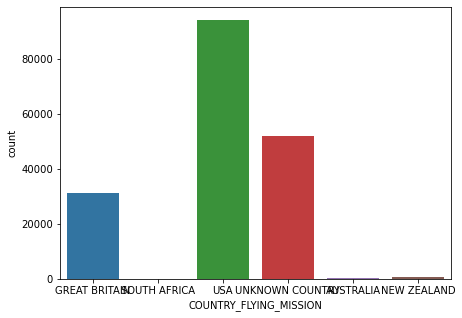

In [50]:
plt.figure(figsize=(7,5))
sns.countplot(df_total["COUNTRY_FLYING_MISSION"])

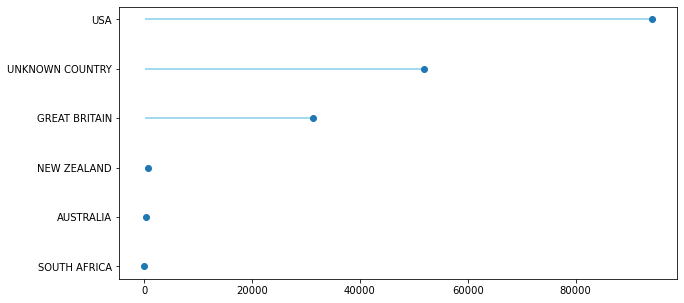

In [51]:
#ME GUSTA
conteo=df_total["COUNTRY_FLYING_MISSION"].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index, xmin=140, xmax=conteo, color="skyblue")
    #^---Esto lo que hace es hacer esas barras horizontales de abajo
plt.plot(conteo, conteo.index, "o")


In [52]:
"""
#ME GUSTA

plt.figure(figsize=(20,20))
sns.scatterplot(x=df_total_44["AC_ATTACKING"],
                y=df_total_44["TOTAL_TONS"],
                s=10,#<---¿?
                hue=df_total_44["COUNTRY_FLYING_MISSION"])
"""

'\n#ME GUSTA\n\nplt.figure(figsize=(20,20))\nsns.scatterplot(x=df_total_44["AC_ATTACKING"],\n                y=df_total_44["TOTAL_TONS"],\n                s=10,#<---¿?\n                hue=df_total_44["COUNTRY_FLYING_MISSION"])\n'

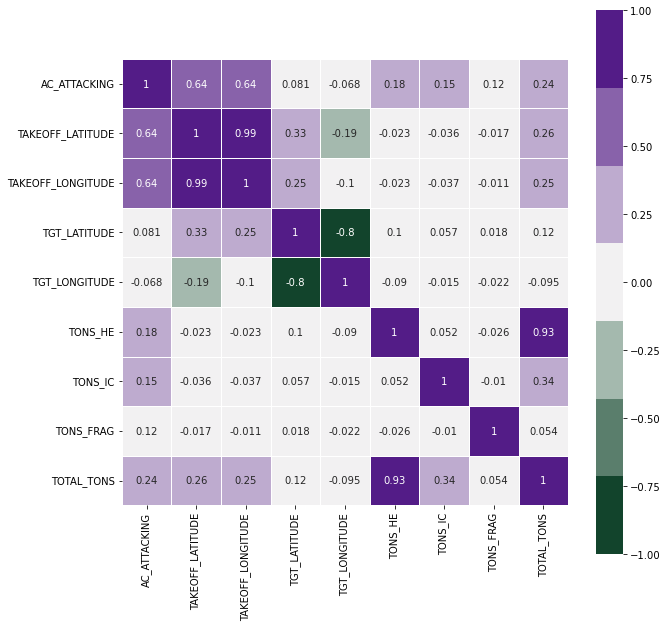

In [53]:
#ME GUSTA
plt.figure(figsize=(10,10))
sns.heatmap(df_total.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);

In [54]:
"""
x=df_total_39.drop(["THEATER", "COUNTRY_FLYING_MISSION", "NAF", "UNIT_ID", "AIRCRAFT_NAME", "TAKEOFF_BASE", "TAKEOFF_COUNTRY", "TAKEOFF_LATITUDE", "TAKEOFF_LONGITUDE", "TGT_COUNTRY", "TGT_LOCATION", "TGT_LATITUDE", "TGT_LONGITUDE", "TONS_HE", "TONS_IC", "TONS_FRAG"], axis=1)
               ^---CUIDADO CON DROP

plt.figure(figsize=(10,10))
sns.heatmap(x,
    square=False,
    linewidths=.9);
"""

'\nx=df_total_39.drop(["THEATER", "COUNTRY_FLYING_MISSION", "NAF", "UNIT_ID", "AIRCRAFT_NAME", "TAKEOFF_BASE", "TAKEOFF_COUNTRY", "TAKEOFF_LATITUDE", "TAKEOFF_LONGITUDE", "TGT_COUNTRY", "TGT_LOCATION", "TGT_LATITUDE", "TGT_LONGITUDE", "TONS_HE", "TONS_IC", "TONS_FRAG"], axis=1)\n               ^---CUIDADO CON DROP\n\nplt.figure(figsize=(10,10))\nsns.heatmap(x,\n    square=False,\n    linewidths=.9);\n'

In [55]:
"""
#y=df_total_39.drop(["THEATER", "COUNTRY_FLYING_MISSION", "NAF", "UNIT_ID", "AIRCRAFT_NAME", "TAKEOFF_BASE", "TAKEOFF_COUNTRY", "TAKEOFF_LATITUDE", "TAKEOFF_LONGITUDE", "TGT_COUNTRY", "TGT_LOCATION", "TGT_LATITUDE", "TGT_LONGITUDE"], axis=1)

plt.figure(figsize=(30,10))
sns.catplot(x = "COUNTRY_FLYING_MISSION",
col = "TGT_COUNTRY",
col_wrap = 4,
data = df_total_45,
kind = "count");
"""

'\n#y=df_total_39.drop(["THEATER", "COUNTRY_FLYING_MISSION", "NAF", "UNIT_ID", "AIRCRAFT_NAME", "TAKEOFF_BASE", "TAKEOFF_COUNTRY", "TAKEOFF_LATITUDE", "TAKEOFF_LONGITUDE", "TGT_COUNTRY", "TGT_LOCATION", "TGT_LATITUDE", "TGT_LONGITUDE"], axis=1)\n\nplt.figure(figsize=(30,10))\nsns.catplot(x = "COUNTRY_FLYING_MISSION",\ncol = "TGT_COUNTRY",\ncol_wrap = 4,\ndata = df_total_45,\nkind = "count");\n'

In [56]:
"""
df_total_45.groupby(["COUNTRY_FLYING_MISSION", "TGT_COUNTRY"]).size().reset_index().pivot(columns="COUNTRY_FLYING_MISSION",
index="TGT_COUNTRY", values = 0)
"""

'\ndf_total_45.groupby(["COUNTRY_FLYING_MISSION", "TGT_COUNTRY"]).size().reset_index().pivot(columns="COUNTRY_FLYING_MISSION",\nindex="TGT_COUNTRY", values = 0)\n'

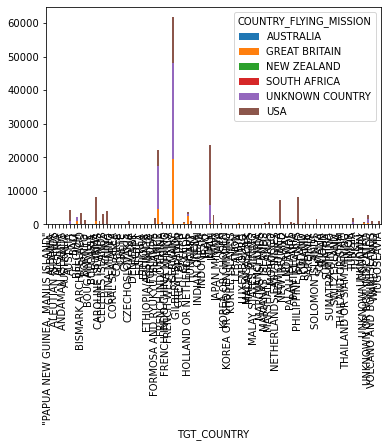

In [57]:
df_plot = df_total.groupby(["COUNTRY_FLYING_MISSION", "TGT_COUNTRY"]).size().reset_index().pivot(columns="COUNTRY_FLYING_MISSION",
index="TGT_COUNTRY", values = 0)
df_plot.plot(kind='bar', stacked=True);

In [58]:
#SUPER INTERESANTE PARA PODER GENERAR DATAFRAMES CON SOLO UNOS TIPOS
"""
eventos_df = df_total_45.loc[df_total_45.TGT_COUNTRY.isin(['GERMANY', 'JAPAN']),:]
eventos_df
"""

"\neventos_df = df_total_45.loc[df_total_45.TGT_COUNTRY.isin(['GERMANY', 'JAPAN']),:]\neventos_df\n"

In [59]:
#Aunque este por ahora no salga (es una gráfica con lineas independientes) podría ser útil para obtener la cantidad de bombas cada año, pero habría que modificar el "df"
"""
plt.figure(figsize=(15,10))
sns.lineplot(data= df_total_40,
            x='TGT_COUNTRY',
            y = 'TOTAL_TONS',
            hue = 'COUNTRY_FLYING_MISSION',
            linewidth = 3);
"""

"\nplt.figure(figsize=(15,10))\nsns.lineplot(data= df_total_40,\n            x='TGT_COUNTRY',\n            y = 'TOTAL_TONS',\n            hue = 'COUNTRY_FLYING_MISSION',\n            linewidth = 3);\n"

In [60]:
"""
import squarify

p = pd.DataFrame({'nb_people':[15,1,1,1], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=df_total_39['COUNTRY_FLYING_MISSION'], df_total_39=p['TGT_COUNTRY'], alpha=.8 )
plt.axis('off')
plt.show()
"""

'\nimport squarify\n\np = pd.DataFrame({\'nb_people\':[15,1,1,1], \'group\':["group A", "group B", "group C", "group D"] })\nsquarify.plot(sizes=df_total_39[\'COUNTRY_FLYING_MISSION\'], df_total_39=p[\'TGT_COUNTRY\'], alpha=.8 )\nplt.axis(\'off\')\nplt.show()\n'

In [61]:
"""
from mpl_toolkits.basemap import Basemap

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=13,13

# Always start witht the basemap function to initialize a map
m=Basemap()
 
# Show the coast lines
m.drawcoastlines()
 
plt.show();
"""

'\nfrom mpl_toolkits.basemap import Basemap\n\n# Set the plot size for this notebook:\nplt.rcParams["figure.figsize"]=13,13\n\n# Always start witht the basemap function to initialize a map\nm=Basemap()\n \n# Show the coast lines\nm.drawcoastlines()\n \nplt.show();\n'

## >Generar DataFrames por Años

### +Generar DataFrame con índice en la Fecha[1]

In [62]:
df_total_39=fun_fechas(df_total, "1939-09-01", "1939")

df_total_40=fun_fechas(df_total, "1940")

df_total_41=fun_fechas(df_total, "1941")

df_total_42=fun_fechas(df_total, "1942")

df_total_43=fun_fechas(df_total, "1943")

df_total_44=fun_fechas(df_total, "1944")

df_total_45=fun_fechas(df_total, "1945", "1945-09-02")

### +Operaciones aeromilitares a lo largo de la Guerra[1]

In [63]:
"""
df.plot.area     -SÍ?
df.plot.barh     -SÍ? - Para ver la frecuencia de algo
df.plot.density  -SÍ? - Para ver la frecuencia de algo
df.plot.hist     -SÍ? - Para ver la frecuencia de algo
df.plot.line     -SÍ  - Para comparar el número de acciones por país
df.plot.scatter  -NO funciona bien
df.plot.bar      -SÍ  - Para el número de cosas (bombardeos)
df.plot.box      -NO funciona bien
df.plot.hexbin   -NO funciona bien
df.plot.kde      -NO
df.plot.pie      -SÍ  - Para las proporciones (modelos de avión)
"""

"""
CREO QUE VA A SER MEJOR UTILIZAR: sns.countplot(pues no va por valores, sino por conteo)
sns.histplot     -SÍ? - Para ver las detonaciones producidas por cada país
sns.jointplot    -INTERESANTE pero...
sns.heatmap      -INTERESANTE pero...
"""
#df_total['MSNDATE'].hist(bins=300);

'\nCREO QUE VA A SER MEJOR UTILIZAR: sns.countplot(pues no va por valores, sino por conteo)\nsns.histplot     -SÍ? - Para ver las detonaciones producidas por cada país\nsns.jointplot    -INTERESANTE pero...\nsns.heatmap      -INTERESANTE pero...\n'

In [64]:
#df_total_45.iloc[-1000:].plot.bar(stacked=True);#<---Esto, en principio, es para hacer gráfica de barras, que se acumulan unas encima de otras

### +Operaciones aeromilitares a lo largo de cada Año [1]

#### · Operaciones en 1939

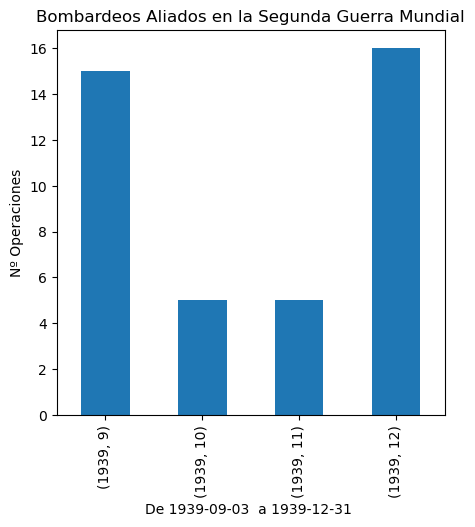

In [65]:
df_crono_39=fun_crono(df_total_39)

#df_crono_39.groupby([df_crono_39["MSNDATE"].dt.year, df_crono_39["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1940

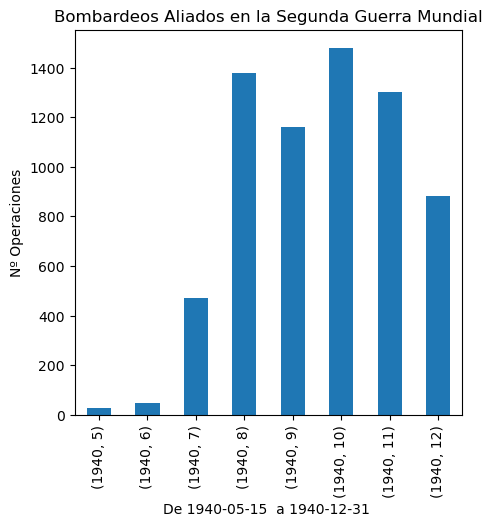

In [66]:
df_crono_40=fun_crono(df_total_40)

#df_crono_40.groupby([df_crono_40["MSNDATE"].dt.year, df_crono_40["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1941

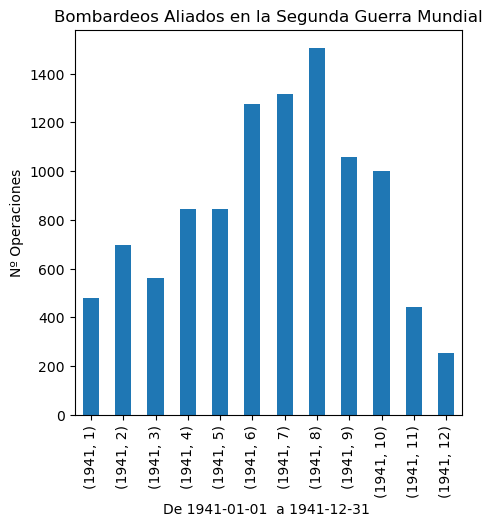

In [67]:
df_crono_41=fun_crono(df_total_41)

#df_crono_41.groupby([df_crono_41["MSNDATE"].dt.year, df_crono_41["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1942

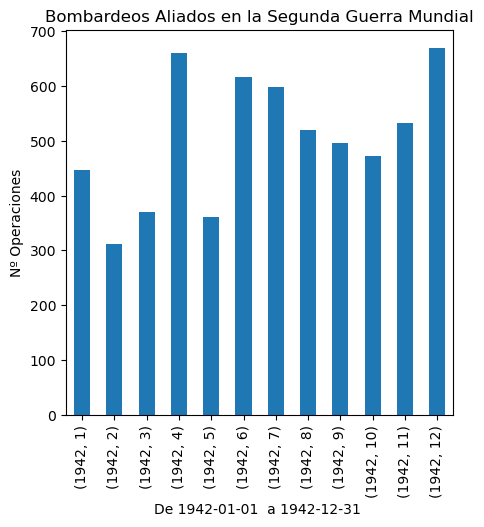

In [68]:
df_crono_42=fun_crono(df_total_42)

#df_crono_42.groupby([df_crono_42["MSNDATE"].dt.year, df_crono_42["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1943

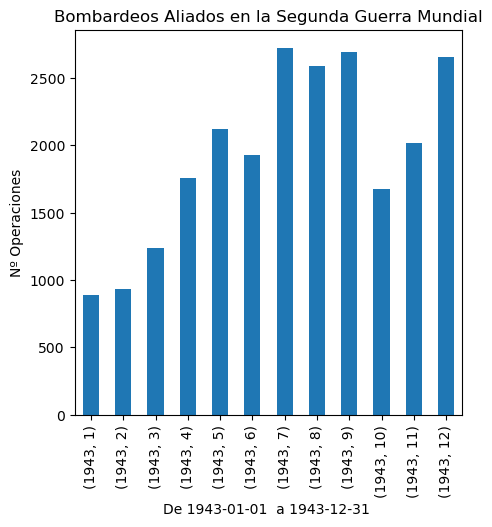

In [69]:
df_crono_43=fun_crono(df_total_43)

#df_crono_43.groupby([df_crono_43["MSNDATE"].dt.year, df_crono_43["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1944

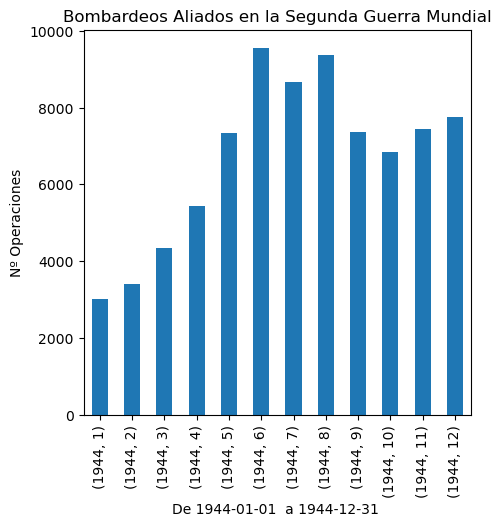

In [70]:
df_crono_44=fun_crono(df_total_44)

#df_crono_44.groupby([df_crono_44["MSNDATE"].dt.year, df_crono_44["MSNDATE"].dt.month]).count().plot(kind="bar")

#### · Operaciones en 1945

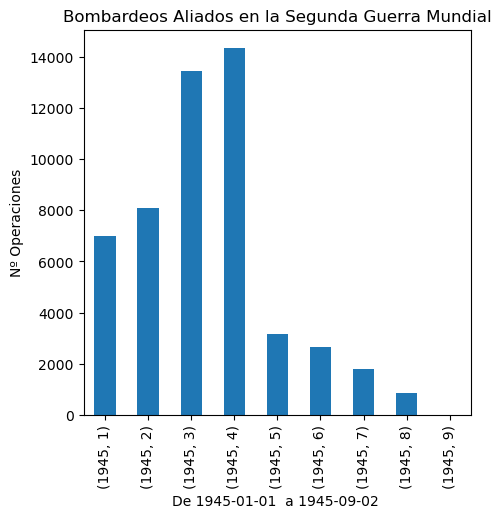

In [71]:
df_crono_45=fun_crono(df_total_45)

#df_crono_45.groupby([df_crono_45["MSNDATE"].dt.year, df_crono_45["MSNDATE"].dt.month]).count().plot(kind="bar")

## >Fechas Destacadas

### Fechas Destacadas

#### Batalla de Francia (del 10 de mayo al 25 de junio de 1940)

In [72]:
df_total_Francia=fun_fechas(df_total, "1940-05-15", "1940-06-25")
#df_total_Francia=df_total_40[:69]#<---15 de mayo a 25 de junio
df_total_Francia=fun_total_inglaterra(df_total_Francia)
df_total_Francia

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WHITLEY,0.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN LOCATION,NaN,NaN,1.0,0.0,0.0,1.0
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,0.0,NaN,NaN,NaN,NaN,GERMANY,ARAD,46.18,21.32,1.0,0.0,0.0,1.0
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,4.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,45.95,7.97,3.0,0.0,0.0,3.0
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,1.0,NaN,NaN,NaN,NaN,GERMANY,ARAD,46.18,21.32,0.0,0.0,0.0,0.0
1940-05-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WELLINGTON,1.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN LOCATION,NaN,NaN,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940-06-25,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WHITLEY,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,ARAD,46.18,21.32,0.0,0.0,0.0,0.0
1940-06-25,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,1.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN LOCATION,NaN,NaN,1.0,0.0,0.0,1.0
1940-06-25,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WHITLEY,0.0,NaN,NaN,NaN,NaN,BELGIUM,ARAD,46.18,21.32,0.0,0.0,0.0,0.0


#### Batalla de Inglaterra (del 10 de julio al 31 de octubre de 1940)

In [73]:
df_total_Inglaterra=fun_fechas(df_total, "1940-07-10", "1940-10-31")
#df_total_Inglaterra=df_total_40[91:4550]#<---10 de julio a 31 de octubre
df_total_Inglaterra=fun_total_inglaterra(df_total_Inglaterra)

df_total_Inglaterra

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1940-07-11,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WELLINGTON,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,UNKNOWN LOCATION,NaN,NaN,2.0,0.0,0.0,2.0
1940-07-11,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WELLINGTON,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,ARAD,46.18,21.32,1.0,0.0,0.0,1.0
1940-07-13,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WELLINGTON,1.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,47.33,14.50,1.0,0.0,0.0,1.0
1940-07-14,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,1.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,NaN,NaN,1.0,0.0,0.0,1.0
1940-07-15,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,UNKNOWN LOCATION,NaN,NaN,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940-10-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WELLINGTON,1.0,NaN,NaN,NaN,NaN,GERMANY,BERLIN,52.53,13.42,2.0,0.0,0.0,2.0
1940-10-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,HAMPDEN,0.0,NaN,NaN,NaN,NaN,GERMANY,BERLIN,52.53,13.42,1.0,0.0,0.0,1.0
1940-10-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,WELLINGTON,10.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,FLUSHING,51.40,3.53,16.0,1.0,0.0,17.0


#### Bombardeo de Colonia (del 30 al 31 de Mayo de 1942)

In [74]:
df_total_Colonia=fun_fechas(df_total, "1942-05-30", "1942-05-31")
#df_total_Colonia=df_total_42[2096:2149]#<---30-31 de Mayo
df_total_Colonia=df_total_Colonia[df_total_Colonia["TGT_LOCATION"]=="COLOGNE"]

df_total_Colonia

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,20.0,0.0,0.0,20.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,1.0,0.0,0.0,1.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,162.0,0.0,0.0,162.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,41.0,0.0,0.0,41.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,10.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,2.0,8.0,0.0,10.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,5.0,14.0,0.0,19.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,0.0,12.0,0.0,12.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,4.0,3.0,0.0,7.0
1942-05-30,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,0.0,2.0,0.0,2.0


#### Bombardeos de Hamburgo (del 24 de julio al 3 de agosto de 1943)

In [75]:
df_total_Hamburgo=fun_fechas(df_total, "1943-07-24", "1943-08-03")
#df_total_Hamburgo=df_total_43[10908:11846]#<---del 24 de julio al 3 de agosto
df_total_Hamburgo=df_total_Hamburgo[df_total_Hamburgo["TGT_LOCATION"]=="HAMBURG"]
df_total_Hamburgo

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,394.0,643.0,0.0,518.0
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,142.0,0.0,0.0,142.0
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,0.0,0.0,0.0,519.0
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,0.0,0.0,0.0,0.0
1943-07-24,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,642.0,149.0,0.0,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943-08-02,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,81.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,4.0,149.0,0.0,153.0
1943-08-02,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,LANCASTER,1.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,3.0,0.0,0.0,3.0
1943-08-02,ETO,GREAT BRITAIN,RAF,UNKNOWN UNIT,MEDIUM,0.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,0.0,0.0,0.0,0.0


#### Incidente de Charlie Brown y Franz Stigler (el 20 de diciembre de 1943)

In [76]:
df_total_Charlie=fun_fechas(df_total, "1943-12-20")
df_total_Charlie=df_total_Charlie[df_total_Charlie["TGT_LOCATION"]=="BREMEN"]
df_total_Charlie

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1943-12-20,ETO,UNKNOWN COUNTRY,UNKNOWN NAF,UNKNOWN UNIT,B24,0.0,NaN,NaN,NaN,NaN,GERMANY,BREMEN,53.08,8.72,0.0,54.0,0.0,54.0
1943-12-20,ETO,UNKNOWN COUNTRY,UNKNOWN NAF,UNKNOWN UNIT,B17,0.0,NaN,NaN,NaN,NaN,GERMANY,BREMEN,53.08,8.72,0.0,37.0,0.0,37.0
1943-12-20,ETO,UNKNOWN COUNTRY,UNKNOWN NAF,UNKNOWN UNIT,B24,0.0,NaN,NaN,NaN,NaN,GERMANY,BREMEN,53.08,8.72,48.0,10.0,0.0,58.0
1943-12-20,ETO,UNKNOWN COUNTRY,UNKNOWN NAF,UNKNOWN UNIT,B24,0.0,NaN,NaN,NaN,NaN,GERMANY,BREMEN,53.08,8.72,0.0,54.0,0.0,54.0
1943-12-20,ETO,UNKNOWN COUNTRY,UNKNOWN NAF,UNKNOWN UNIT,B17,0.0,NaN,NaN,NaN,NaN,GERMANY,BREMEN,53.08,8.72,0.0,27.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943-12-20,ETO,UNKNOWN COUNTRY,UNKNOWN NAF,UNKNOWN UNIT,B24,0.0,NaN,NaN,NaN,NaN,GERMANY,BREMEN,53.08,8.72,0.0,14.0,0.0,14.0
1943-12-20,ETO,UNKNOWN COUNTRY,UNKNOWN NAF,UNKNOWN UNIT,B24,0.0,NaN,NaN,NaN,NaN,GERMANY,BREMEN,53.08,8.72,61.0,0.0,0.0,61.0
1943-12-20,ETO,UNKNOWN COUNTRY,UNKNOWN NAF,UNKNOWN UNIT,B24,0.0,NaN,NaN,NaN,NaN,GERMANY,BREMEN,53.08,8.72,61.0,0.0,0.0,61.0


#### Bombardeos de Wuhan (del 18 al 21 de diciembre de 1944)

In [77]:
df_total_Wuhan=fun_fechas(df_total, "1944-12-18", "1944-12-21")
#df_total_Wuhan=df_total_44[-3888:-3237]#<---18-19 y 21 de diciembre de 1944

#Por algún motivo, la localización de Wuhan no está referida como "WUHAN", sino como "HANKOW", "HANKON", "HAINAN ISLAND", "WUCHUANG" y "WUCHANG". Esto se puede comprobar por las coordenadas.
A=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKOW"]
B=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKON"]
C=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HAINAN ISLAND"]
D=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="WUCHUANG"]
D=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="WUCHANG"]
df_total_Wuhan = A.append([B,C,D])

df_total_Wuhan=df_total_Wuhan.sort_values(by='MSNDATE')

df_total_Wuhan

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1944-12-18,CBI,USA,14 AF,374 BS,B24,6.0,NaN,NaN,NaN,NaN,CHINA,HANKON,30.60,114.333333,0.0,0.0,17.0,17.0
1944-12-18,CBI,USA,14 AF,373 BS,B24,8.0,NaN,NaN,NaN,NaN,CHINA,HANKON,30.60,114.333333,0.0,0.0,17.0,17.0
1944-12-18,CBI,USA,14 AF,491 BS,B25,10.0,NaN,NaN,NaN,NaN,CHINA,HAINAN ISLAND,30.60,114.333333,0.0,0.0,2.0,3.0
1944-12-19,CBI,USA,20 AF,40 BG,B29,1.0,NaN,NaN,NaN,NaN,CHINA,HANKOW,30.55,114.283333,1.0,1.0,0.0,2.0
1944-12-19,CBI,USA,20 AF,444 BG,B29,1.0,NaN,NaN,NaN,NaN,CHINA,HANKOW,30.55,114.283333,2.0,1.0,0.0,3.0
1944-12-21,CBI,USA,14 AF,75 FS,P51,1.0,NaN,NaN,NaN,NaN,CHINA,HANKON,30.60,114.333333,2.0,0.0,0.0,2.0


#### Bombardeos de Dresde (del 13 al 15 de febrero de 1945)

In [78]:
df_total_Dresden=fun_fechas(df_total, "1945-02-13", "1945-02-15")
df_total_Dresden=df_total_Dresden[df_total_Dresden["TGT_LOCATION"]=="DRESDEN"]

#df_total_Dresden=df_total_45[df_total_45["TGT_LOCATION"]=="DRESDEN"]
#df_total_Dresden=df_total_Dresden[19:85]

fun_gps2(df_total_Dresden, x=13.75, y=51.05, z=11.5, escala=True, minimapa=True)

In [79]:
fun_gps(df_total_42, x=5, y=55, z=4, minimapa=False, tons=100, escala=True)

In [80]:
df_total["TAKEOFF_COUNTRY"].value_counts()

ITALY              1112
EGYPT               301
SICILY              264
AUSTRALIA           249
INDIA               235
TUNISIA             182
LIBYA               173
PALESTINE           121
BURMA               101
CHINA                88
SOLOMON ISLANDS      81
USA                  71
IRAQ                 63
INDONESIA            51
MALTA                51
ENGLAND              41
SUDAN                40
NEW GUINEA           36
NEW HEBRIDES         21
PHILLIPINES          14
KENYA                13
YEMEN                11
UK                    8
ELLICE ISLANDS        7
CEYLON                1
BORNEO                1
CORSICA               1
GERMANY               1
Name: TAKEOFF_COUNTRY, dtype: int64

In [81]:
z=df_total[df_total["TAKEOFF_COUNTRY"]=="KENYA"]
#z=z["TGT_LONGITUDE"].sort_values()
"""
1942-08-05     0.03
1942-07-04     0.03
"""
z


,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1940-06-13,MTO,SOUTH AFRICA,SAAF,12 SQDN,JU.86,4.0,NAIROBI,KENYA,-1.2833,36.8167,ETHIOPIA,ITALIAN MOYALE,3.527000,39.056000,0.0,0.0,0.0,0.00
1940-06-16,MTO,SOUTH AFRICA,SAAF,12/11 SQDN,JU.86/HARTBEE/JU86,7.0,NAIROBI,KENYA,-1.2833,36.8167,ETHIOPIA,"""YAVELLO, MEGA, NEGHELLI (ABYSSINIA)""",4.883333,38.083333,0.0,0.0,0.0,0.00
1940-08-19,MTO,SOUTH AFRICA,SAAF,UNKNOWN UNIT,UNKNOWN NAME,0.0,NAIROBI,KENYA,-1.2833,36.8167,ETHIOPIA,"""AFMADU, GODWEN, YAVELLO, NEGHELLI, LUGH FERRA...",4.883330,38.083300,0.0,0.0,0.0,0.00
1940-08-21,EAST AFRICA,SOUTH AFRICA,SAAF,11 SQDN,FAIREY BATTLE,6.0,NAIROBI,KENYA,-1.2833,36.8167,SOMALIA,MOGADISHU,2.041100,45.342600,6.0,0.0,0.0,0.00
1940-09-03,MTO,SOUTH AFRICA,SAAF,12 SQDN,JU.86,3.0,NAIROBI,KENYA,-1.2833,36.8167,ETHIOPIA,YAVELLO,4.883333,38.083333,0.0,0.0,0.0,1.18
1940-09-04,EAST AFRICA,SOUTH AFRICA,SAAF,11 SQDN,FAIREY BATTLE,3.0,NAIROBI,KENYA,-1.2833,36.8167,SOMALIA,ISHA BAIDOA,3.066667,43.649802,3.0,0.0,0.0,0.00
1940-09-09,MTO,SOUTH AFRICA,SAAF,11 SQDN,FAIREY BATTLES,6.0,NAIROBI,KENYA,-1.2833,36.8167,ETHIOPIA,SHASHAMANA (ABYSSINIA),7.200000,38.600000,6.0,0.0,0.0,6.00
1940-09-18,MTO,SOUTH AFRICA,SAAF,12 SQDN,JU.86,2.0,NAIROBI,KENYA,-1.2833,36.8167,ETHIOPIA,YAVELLO,4.883333,38.083333,0.0,0.0,0.0,0.00
1940-11-07,MTO,SOUTH AFRICA,SAAF,12 SQDN,JU.86,0.0,NAIROBI,KENYA,-1.2833,36.8167,ETHIOPIA,GARDULLA ( ABYSSINIA),5.633000,37.417000,0.0,0.0,0.0,1.13


In [82]:
fun_camino(df_total_39, version=False, x=5, y=53.5, z=5.5)

In [83]:
r = folium.Map(location=[41, 15], zoom_start=2)#, tiles=(mapa(tile)))
lista=[]
for (index, row) in df_total_39.iterrows():
    m=[row.loc['TAKEOFF_LATITUDE'], row.loc['TAKEOFF_LONGITUDE']]
    n=[row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']]
    x=[m, n]
    lista.append(x)
    plugins.AntPath(lista).add_to(r)
print ("hola")#r

hola


In [84]:
bm=df_total_44[df_total_44["TAKEOFF_BASE"]=='POMIGLIANO AIRFIELD']
bmm=bm[bm.index=="1944-01-13"]
bmm

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1944-01-13,MTO,USA,12 AF,86 FBG,A36,0.0,POMIGLIANO AIRFIELD,ITALY,40.916667,14.4,ITALY,FROSINONE,41.63,13.37,12.0,0.0,0.0,12.0
1944-01-13,MTO,USA,12 AF,86 FBG,A36,0.0,POMIGLIANO AIRFIELD,ITALY,40.916667,14.4,ITALY,VALMONTONE,41.77,12.95,3.0,0.0,0.0,3.0
1944-01-13,MTO,USA,12 AF,86 FBG,A36,0.0,POMIGLIANO AIRFIELD,ITALY,40.916667,14.4,ITALY,CASSINO,41.48,13.82,2.0,0.0,0.0,2.0
1944-01-13,MTO,USA,12 AF,86 FBG,A36,0.0,POMIGLIANO AIRFIELD,ITALY,40.916667,14.4,ITALY,FERENTINO,41.68,13.28,17.5,0.0,0.0,17.5
1944-01-13,MTO,USA,12 AF,86 FBG,A36,0.0,POMIGLIANO AIRFIELD,ITALY,40.916667,14.4,ITALY,ISOLA DOVARESE,41.67,13.58,6.0,0.0,0.0,6.0
1944-01-13,MTO,USA,12 AF,86 FBG,A36,0.0,POMIGLIANO AIRFIELD,ITALY,40.916667,14.4,ITALY,FROSINONE,41.63,13.37,6.0,0.0,0.0,6.0
1944-01-13,MTO,USA,12 AF,86 FBG,A36,0.0,POMIGLIANO AIRFIELD,ITALY,40.916667,14.4,ITALY,FROSINONE,41.63,13.37,7.5,0.0,0.0,7.5
1944-01-13,MTO,USA,12 AF,86 FBG,A36,0.0,POMIGLIANO AIRFIELD,ITALY,40.916667,14.4,ITALY,VALMONTONE,41.77,12.95,5.5,0.0,0.0,5.5


In [85]:
r = folium.Map(location=[41, 15], zoom_start=6)#, tiles=(mapa(tile)))
lista=[]
for (index, row) in bmm.iterrows():
    m=[row.loc['TAKEOFF_LATITUDE'], row.loc['TAKEOFF_LONGITUDE']]
    n=[row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']]
    x=[m, n]
    lista.append(x)
    #lista.append(x)
    plugins.AntPath(lista).add_to(r)
r

#### Bombardeos de Tokio (el 9 de marzo de 1945)

In [86]:
df_total_Tokyo=fun_fechas(df_total, "1945-03-09")
df_total_Tokyo=df_total_Tokyo[df_total_Tokyo["TGT_LOCATION"]=="TOKYO"]

#df_total_Tokyo=df_total_45[df_total_45["TGT_LOCATION"]=="TOKYO"]
#df_total_Tokyo=df_total_Tokyo[79:97]

fun_gps2(df_total_Tokyo, x=139.7, y=35.665, z=14, tile=1)

#### Bombardeos de Hiroshima y Nagasaki (del 6 y el 9 de agosto de 1945)

In [87]:
df_total_Hiroshima=fun_fechas(df_total, "1945-08-06")
df_total_Hiroshima=df_total_Hiroshima[df_total_Hiroshima["TGT_LOCATION"]=="HIROSHIMA"]
#df_total_Hiroshima=df_total.iloc[-569]


df_total_Nagasaki=fun_fechas(df_total, "1945-08-09")
df_total_Nagasaki=df_total_Nagasaki[df_total_Nagasaki["TGT_LOCATION"]=="NAGASAKI"]
#df_total_Nagasaki=df_total.iloc[-322]

df_total_Hiroshima
df_total_Nagasaki

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1945-08-09,PTO,USA,20 AF,509 CG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,NAGASAKI,32.733333,129.866667,20000.0,0.0,0.0,20000.0


## >Teatro de Operaciones más frecuente [X]

### Teatro de Operaciones más frecuentes, en Total

C:\Users\ferbi\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='THEATER', ylabel='count'>

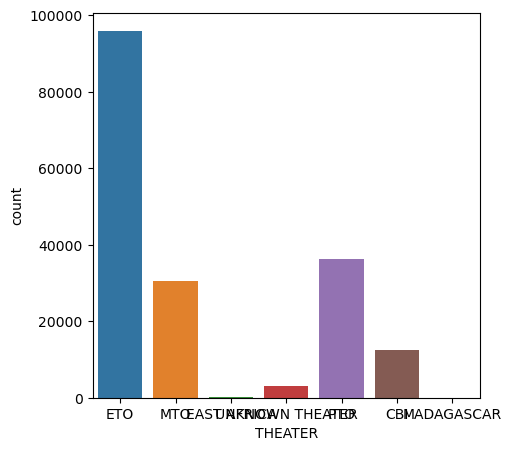

In [88]:
plt.figure(figsize=(5,5))
sns.countplot(df_total["THEATER"])

### Teatro de Operaciones más frecuente, según País Atacante, en Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

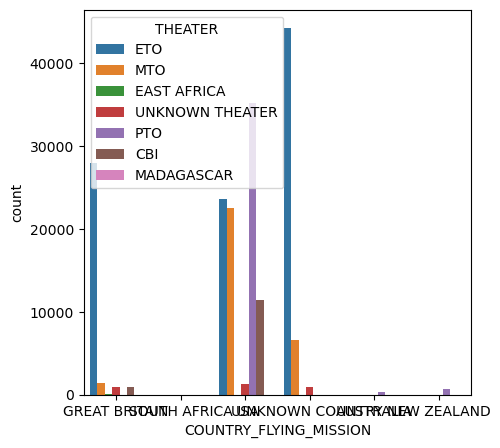

In [89]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=(df_total))

### Teatro de Operaciones más frecuente, según País Atacante, en 1945

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

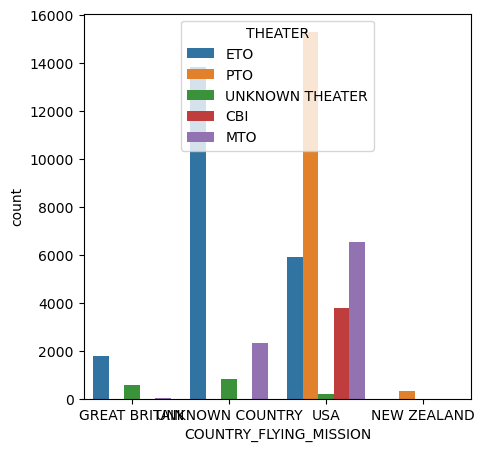

In [90]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total_45)

### Teatro de Operaciones más frecente, según País Atacante, en Total, con ataques superiores a 100 y 800 de Daño Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

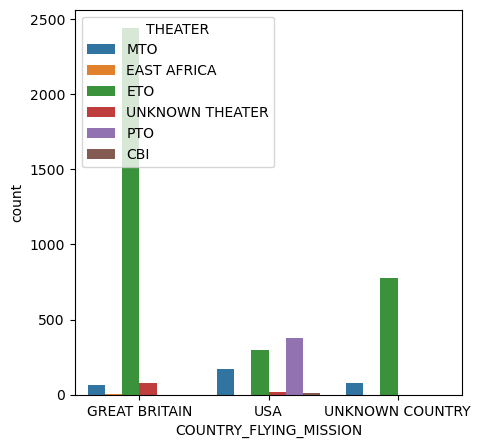

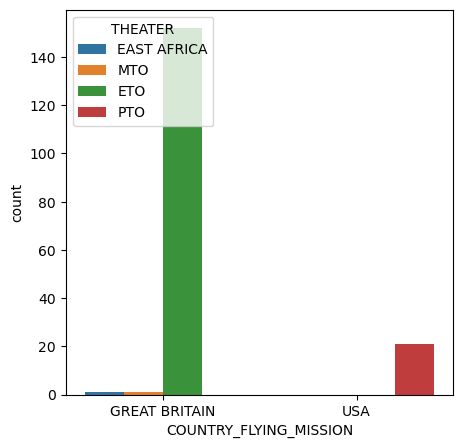

In [91]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total[df_total["TOTAL_TONS"]>100])

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total[df_total["TOTAL_TONS"]>800])

## >Modelos de Avión más frecuentes [casi perfecto]

### Modelos de Avión más frecuentes, en Total

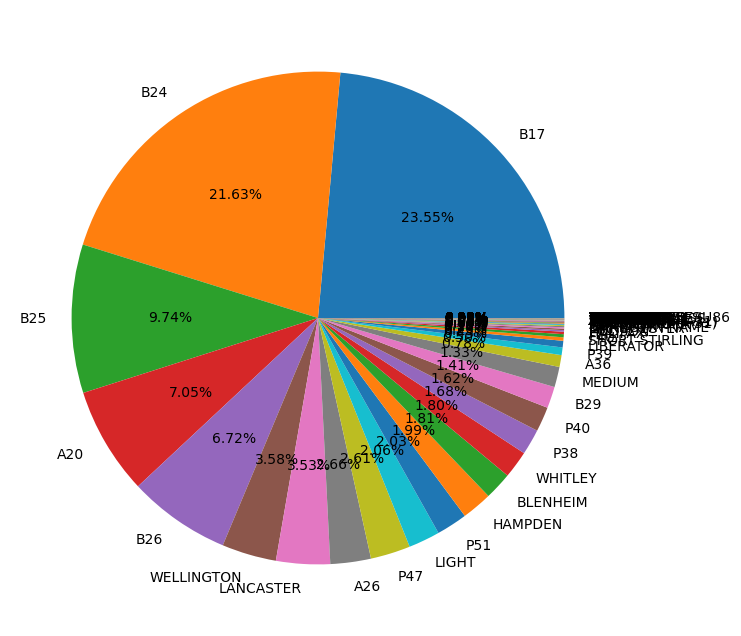

In [92]:
fun_modelos_avion(df_total)

### Modelos de Avión más frecuentes, en Total, particularizando los 10 más frecuentes

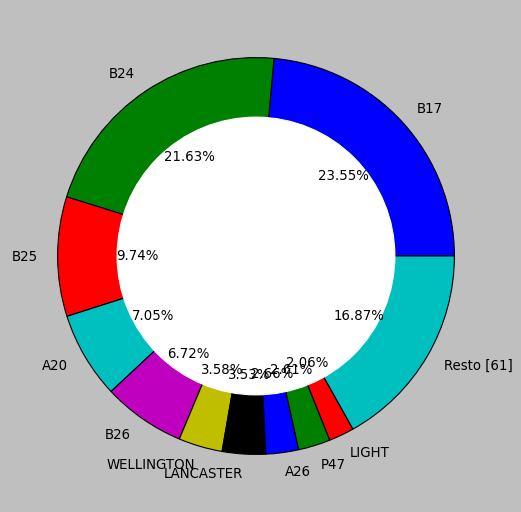

In [93]:
fun_modelos_avion(df_total, top=10, circulo=True, style=1)

### Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 400

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

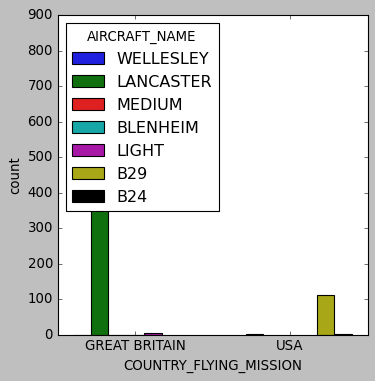

In [94]:
df_total_Tons_600=df_total[df_total["TOTAL_TONS"]>400]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_600)

### Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 600

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

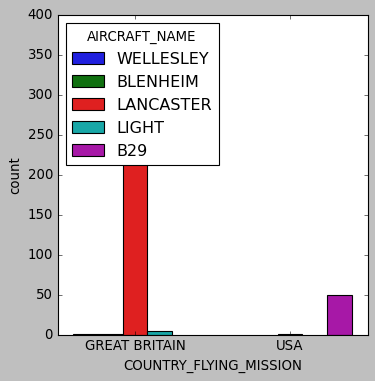

In [95]:
df_total_Tons_600=df_total[df_total["TOTAL_TONS"]>600]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_600)

### Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 1000

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

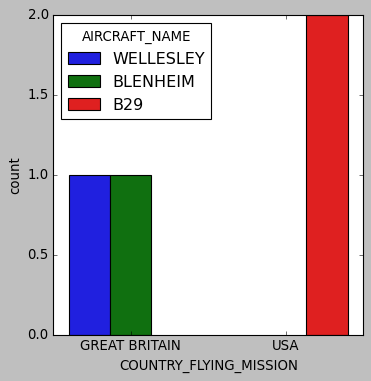

In [96]:
df_total_Tons_1000=df_total[df_total["TOTAL_TONS"]>1000]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_1000)

#### Modelos de Avión más utilizados por Inglaterra en la Batalla de Inglaterra

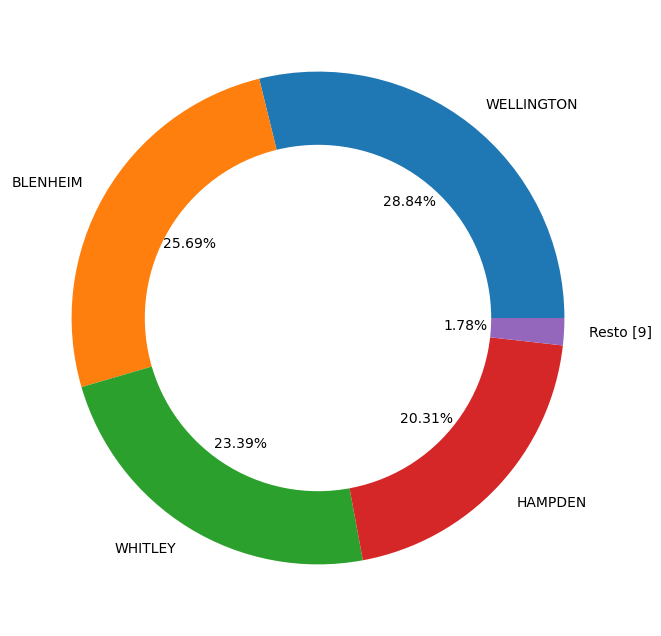

In [97]:
fun_modelos_avion(df_total_Inglaterra, top=4, circulo=True)

## >Destrucción Total

### +Destrucción Total a lo largo de toda la Guerra

<AxesSubplot:xlabel='MSNDATE'>

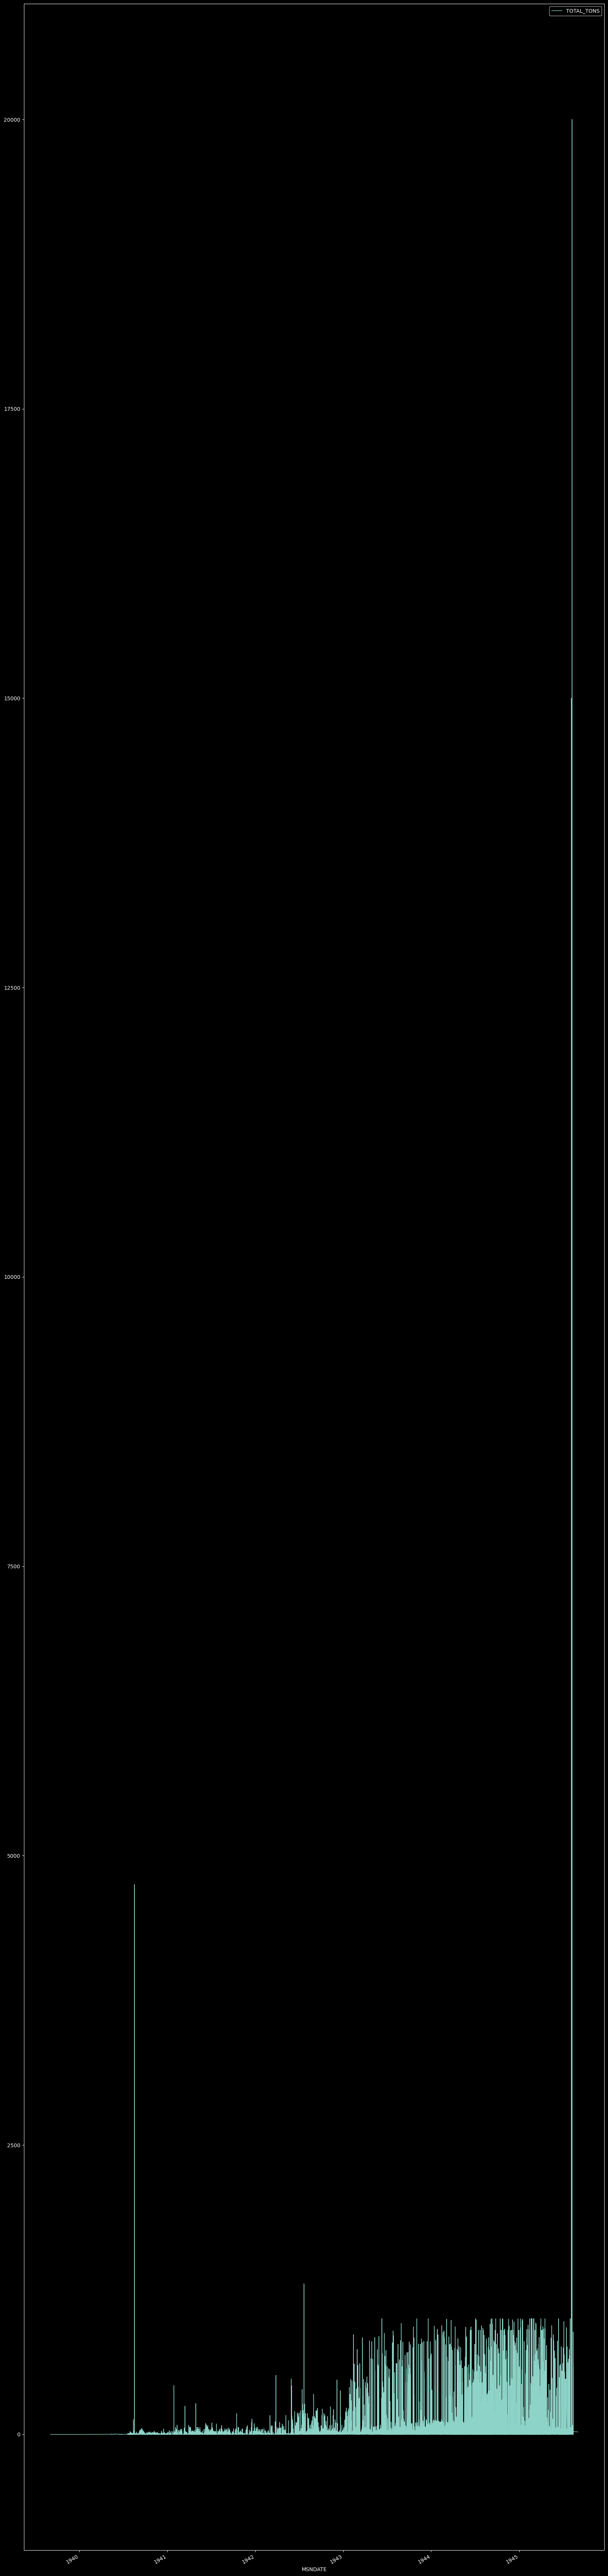

In [98]:
plt.style.use('dark_background')
c=df_total#[df_total["TOTAL_TONS"]<1000]  #<---Si queremos eliminar las operaciones ultradestructivas
c.plot.line(y='TOTAL_TONS',figsize=(20,100),lw=1)

### Detonaciones superiores a 990 Tonelada de Drestrucción Total

35


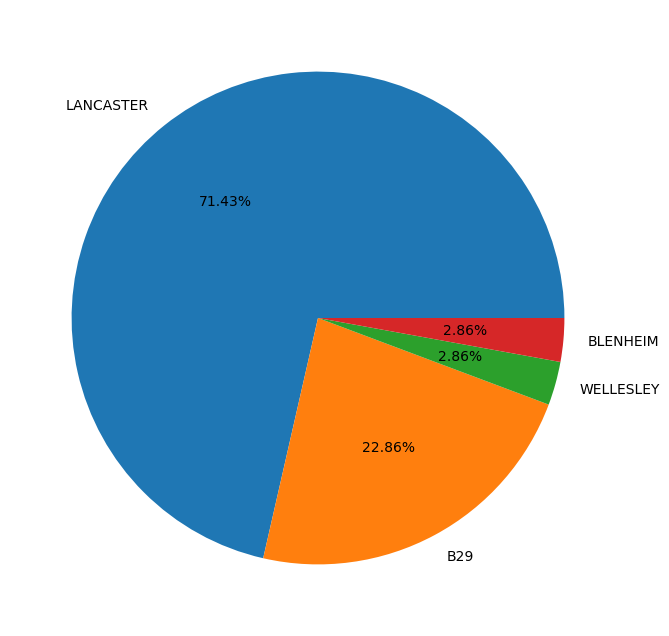

In [99]:
df_total_Tons_990=df_total[df_total["TOTAL_TONS"]>=990]
print (len(df_total_Tons_990))
fun_modelos_avion(df_total_Tons_990)

### Destrucción Total, en Total

C:\Users\ferbi\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL_TONS', ylabel='count'>

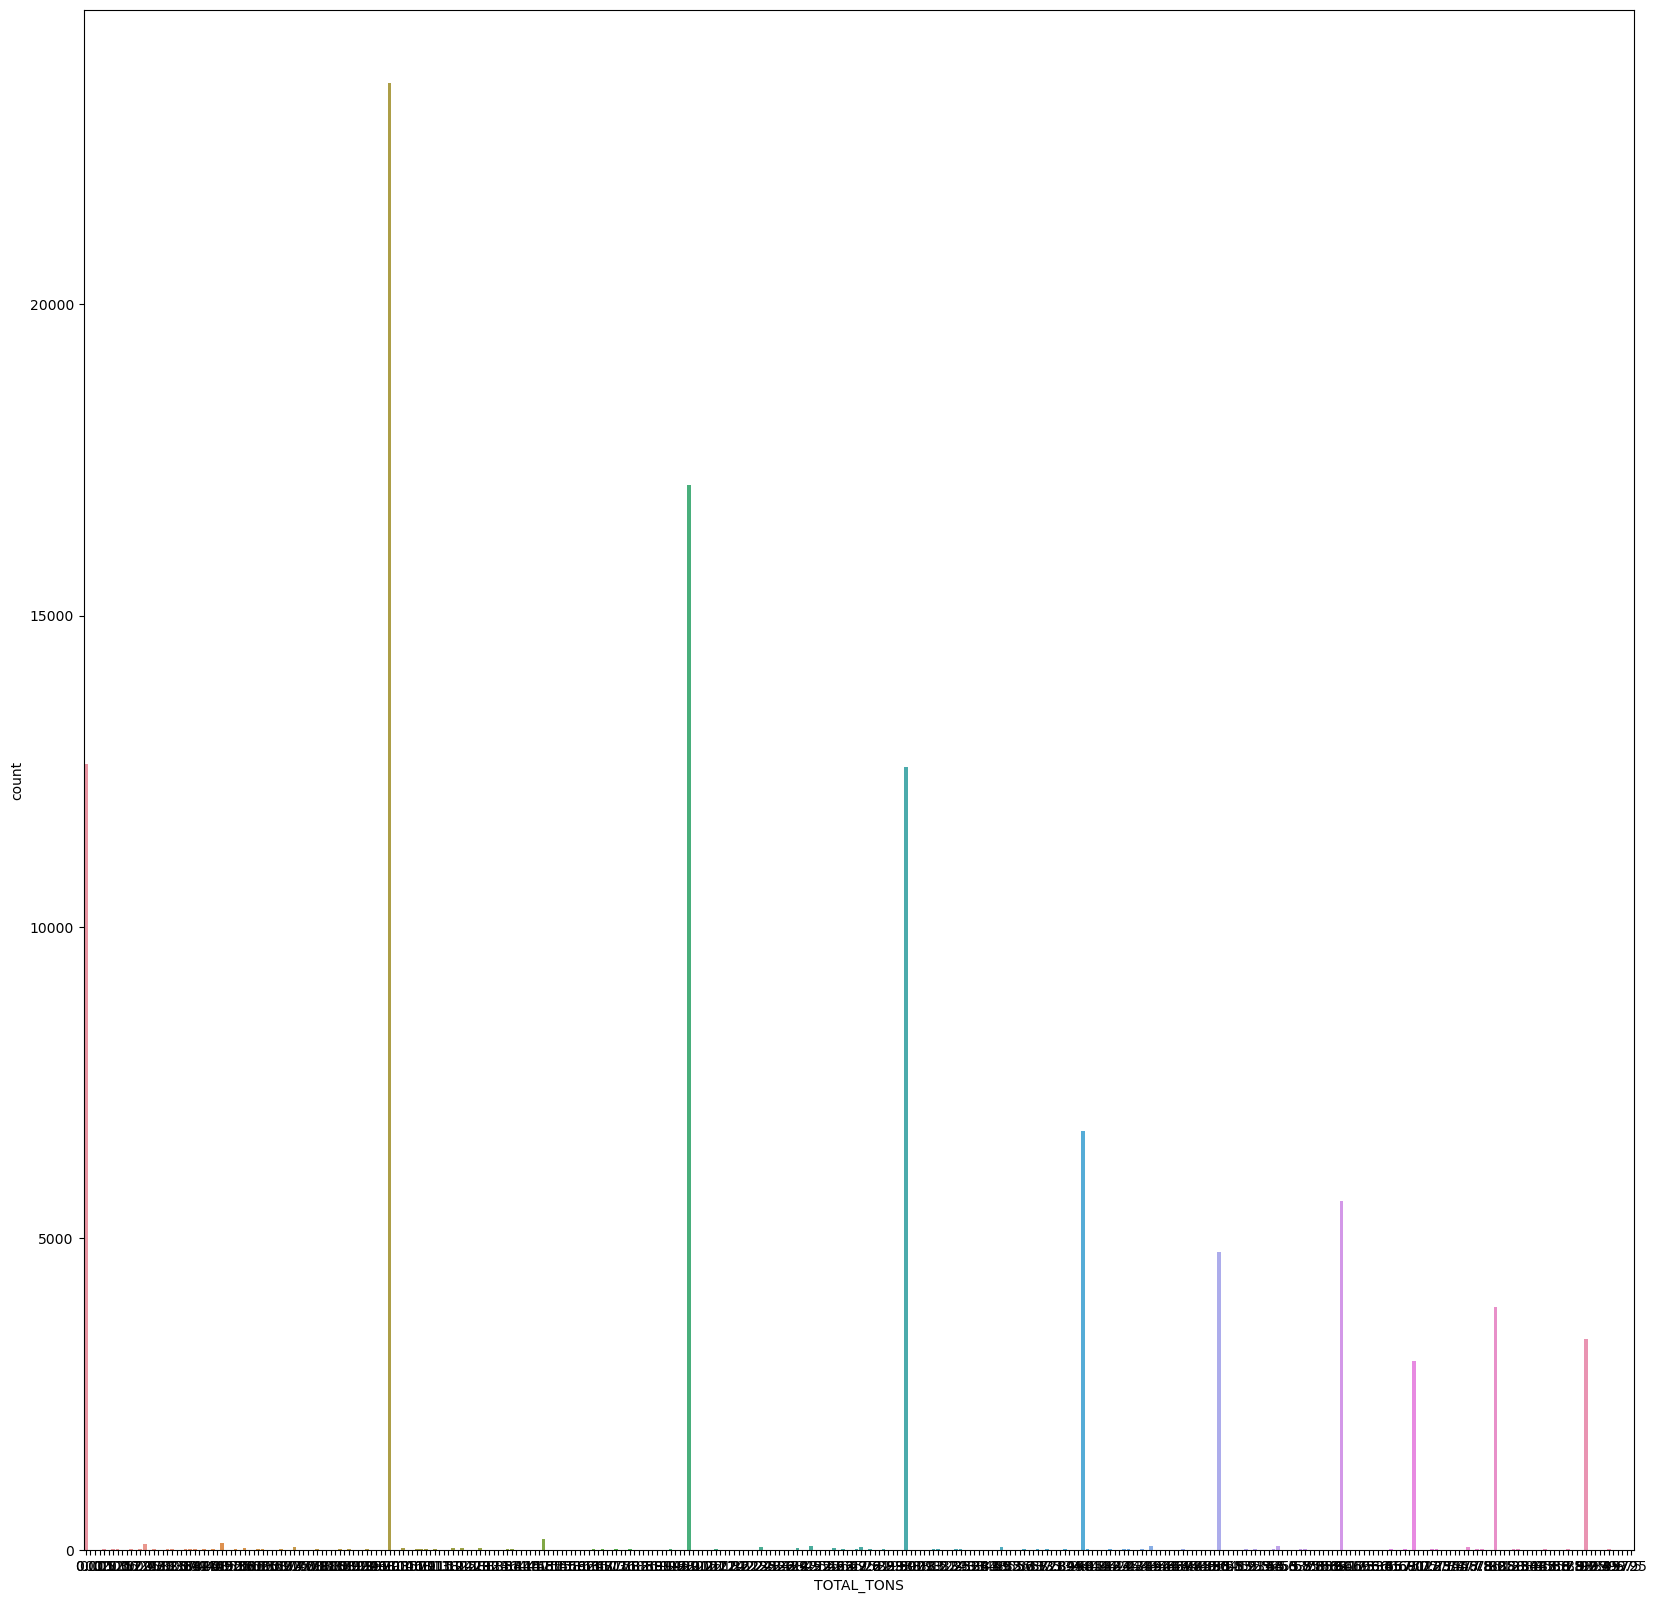

In [100]:
plt.figure(figsize=(20,20))

s=df_total[df_total["TOTAL_TONS"]<10]
#x=df_total["TOTAL_TONS"].value_counts()
sns.countplot(s["TOTAL_TONS"])

<AxesSubplot:ylabel='Density'>

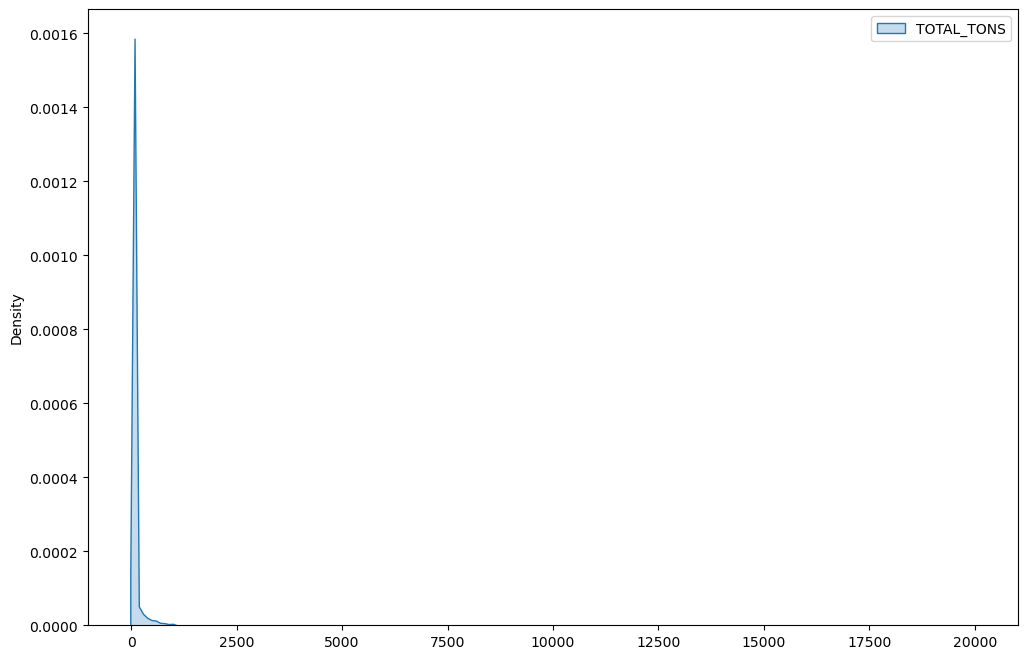

In [101]:
s=df_total.drop(['TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE', 'COUNTRY_FLYING_MISSION',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'TGT_LATITUDE', 'TGT_LONGITUDE'], axis=1)

plt.figure(figsize=(12,8))
sns.kdeplot(data=s[s.columns.values], shade=True)

### Destrucción Total, en Total, según Países Atacados

In [102]:
# Obtener la sum() de TONS_TOTAL de cada país

### Media de la Destrucción Total (los 7 mayores), en Total, según los Modelos de Avión [1]

In [103]:
df_aviones_Tons_mean=df_total.groupby(['AIRCRAFT_NAME']).mean()
df_aviones_Tons_mean=(df_aviones_Tons_mean.sort_values('TOTAL_TONS', ascending=False))[:7]
df_aviones_Tons_mean["TOTAL_TONS"]

AIRCRAFT_NAME
WELLESLEY    239.514000
LANCASTER    151.381232
B29           76.754249
LIBERATOR     49.266346
B26           29.809339
B17           29.735774
B24           25.015677
Name: TOTAL_TONS, dtype: float64

### Densidad de la Destrucción Total, en los B-17

In [104]:
"""
s=df_total[df_total["AIRCRAFT_NAME"]=="B17"]
s["TOTAL_TONS"].value_counts()

plt.figure (figsize=(20,10))
sns.kdeplot(s["TOTAL_TONS"])
"""

'\ns=df_total[df_total["AIRCRAFT_NAME"]=="B17"]\ns["TOTAL_TONS"].value_counts()\n\nplt.figure (figsize=(20,10))\nsns.kdeplot(s["TOTAL_TONS"])\n'

### Densidad de la Destrucción Total, en los B-29

In [105]:
"""
s=df_total[df_total["AIRCRAFT_NAME"]=="B29"]
s["TOTAL_TONS"].value_counts()

plt.figure (figsize=(20,10))
sns.kdeplot(s["TOTAL_TONS"])
"""

'\ns=df_total[df_total["AIRCRAFT_NAME"]=="B29"]\ns["TOTAL_TONS"].value_counts()\n\nplt.figure (figsize=(20,10))\nsns.kdeplot(s["TOTAL_TONS"])\n'

### Densidad de la Destrucción Total, en los WELLESLEY

In [106]:
"""
s=df_total[df_total["AIRCRAFT_NAME"]=="WELLESLEY"]
s["TOTAL_TONS"].value_counts()

plt.figure (figsize=(20,10))
sns.kdeplot(s["TOTAL_TONS"])
"""

'\ns=df_total[df_total["AIRCRAFT_NAME"]=="WELLESLEY"]\ns["TOTAL_TONS"].value_counts()\n\nplt.figure (figsize=(20,10))\nsns.kdeplot(s["TOTAL_TONS"])\n'

In [107]:
"""
c=df_total_45["AIRCRAFT_NAME"].value_counts()
m=c.index
lista=[]
for i in m:
    lista.append(i)
    print (i)
print(df_total_45["AIRCRAFT_NAME"].value_counts())
print (lista)
"""

'\nc=df_total_45["AIRCRAFT_NAME"].value_counts()\nm=c.index\nlista=[]\nfor i in m:\n    lista.append(i)\n    print (i)\nprint(df_total_45["AIRCRAFT_NAME"].value_counts())\nprint (lista)\n'

# OTROS

### +Número de combinaciones entre Reino Unido y los Países Atacados

<AxesSubplot:xlabel='TGT_COUNTRY,COUNTRY_FLYING_MISSION'>

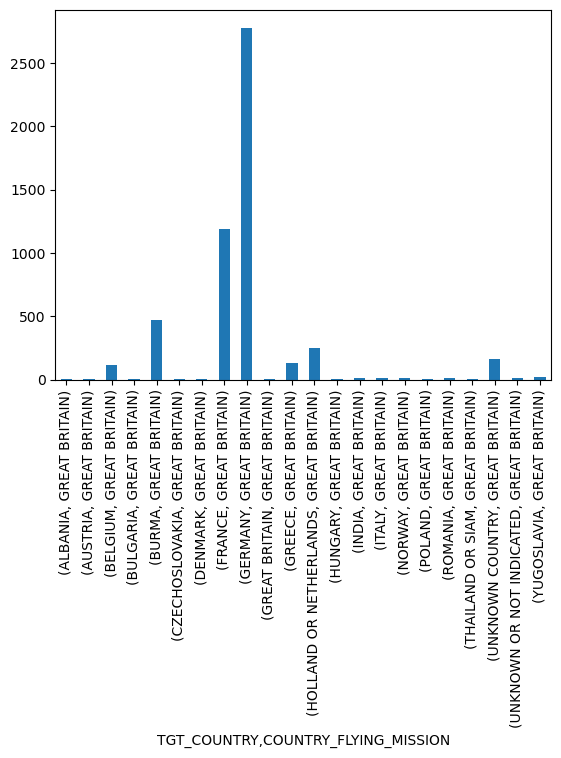

In [108]:
x=df_total_44[df_total_44["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]

groups = x.groupby(['TGT_COUNTRY','COUNTRY_FLYING_MISSION']).size()
groups.plot.bar()

In [109]:
fun_uso_avion(fun_fechas(df_total, "1941", "1941-12-31"))

Nombre del Modelo: WELLINGTON
·Pais más común: GREAT BRITAIN
·Número de Bombardeos: 3974
·Destrucción Total: 16897.45 
·Media de Destrucción Total: 4.252
·Mediana de Destrucción Total: 1.0 

Nombre del Modelo: HAMPDEN
·Pais más común: GREAT BRITAIN
·Número de Bombardeos: 2181
·Destrucción Total: 5884.0 
·Media de Destrucción Total: 2.698
·Mediana de Destrucción Total: 1.0 

Nombre del Modelo: WHITLEY
·Pais más común: GREAT BRITAIN
·Número de Bombardeos: 1704
·Destrucción Total: 6270.0 
·Media de Destrucción Total: 3.68
·Mediana de Destrucción Total: 1.0 

Nombre del Modelo: BLENHEIM
·Pais más común: GREAT BRITAIN
·Número de Bombardeos: 1033
·Destrucción Total: 1084.83 
·Media de Destrucción Total: 1.05
·Mediana de Destrucción Total: 1.0 

Nombre del Modelo: MEDIUM
·Pais más común: GREAT BRITAIN
·Número de Bombardeos: 377
·Destrucción Total: 2526.0 
·Media de Destrucción Total: 6.7
·Mediana de Destrucción Total: 1.0 

Nombre del Modelo: SHORT STIRLING
·Pais más común: GREAT BRITAIN
·Núm

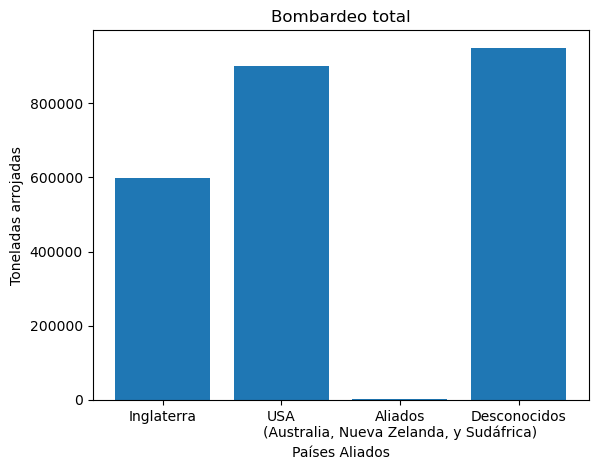

In [110]:
fun_suma_tons (df_total_44)

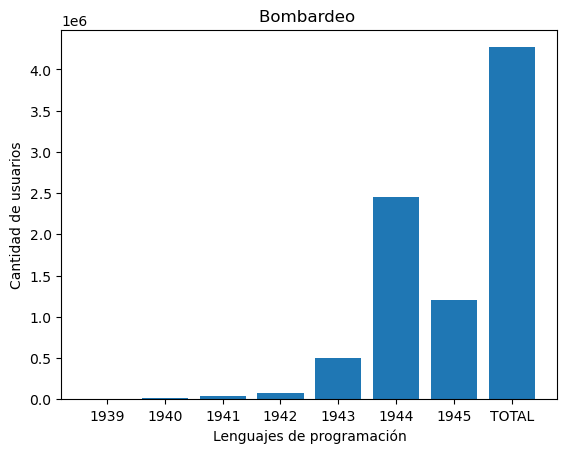

In [111]:
  
aa=int(sum(df_total_39["TOTAL_TONS"]))
bb=int(sum(df_total_40["TOTAL_TONS"]))
cc=int(sum(df_total_41["TOTAL_TONS"]))
dd=int(sum(df_total_42["TOTAL_TONS"]))
ee=int(sum(df_total_43["TOTAL_TONS"]))
ff=int(sum(df_total_44["TOTAL_TONS"]))
gg=int(sum(df_total_45["TOTAL_TONS"]))
hh=int(sum(df_total["TOTAL_TONS"]))

toneladas=[aa, bb, cc, dd, ee, ff, gg, hh]
años=["1939", "1940", "1941", "1942", "1943", "1944", "1945", "TOTAL"]

 
## Creamos Gráfica
plt.bar(años, toneladas)
 
## Legenda en el eje y
plt.ylabel('Cantidad de usuarios')
 
## Legenda en el eje x
plt.xlabel('Lenguajes de programación')
 
## Título de Gráfica
plt.title("Bombardeo ")
 
## Mostramos Gráfica
plt.show()

[0, 15097, 38883, 57144, 177120, 597792, 226559, 1112598] [0, 24, 123, 7767, 191303, 899267, 526504, 1624989] [0, 8, 7, 475, 45, 1378, 1205, 3120] [0, 0, 0, 4222, 129293, 948950, 444832, 1527297]


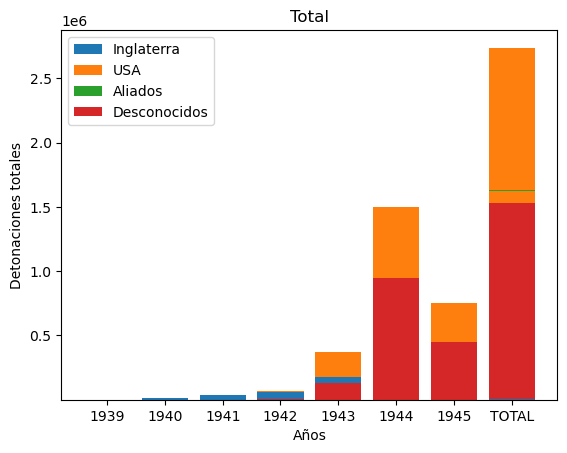

In [112]:
#Ideal para la acción de cada país en cada año

lista_suprema=[df_total_39, df_total_40, df_total_41, df_total_42, df_total_43, df_total_44, df_total_45, df_total]
años=["1939", "1940", "1941", "1942", "1943", "1944", "1945", "TOTAL"]
inglaterra=[]
usa=[]
aliados=[]
desconocidos=[]

for i in lista_suprema:
    a=int(sum((fun_total_inglaterra(i))["TOTAL_TONS"]))
    b=int(sum((fun_total_usa(i))["TOTAL_TONS"]))
    c=int(sum((fun_total_aliados(i))["TOTAL_TONS"]))
    d=int(sum((fun_total_desconocidos(i))["TOTAL_TONS"]))
    inglaterra.append(a)
    usa.append(b)
    aliados.append(c)
    desconocidos.append(d)

print (inglaterra, usa, aliados, desconocidos)
    



"""
grupos = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 3']
hombres = [28,45,34,88]
mujeres = [10,72,37,65]
 
indice = np.arange(len(grupos))
 
## Se crean las primeras barras
plt.bar(indice, hombres, label='Hombres')
 
## Se crean las segundas barras y se apilan sobre las primeras
plt.bar(indice, mujeres, label='Mujeres',  bottom=hombres)
 
plt.xticks(indice, grupos)
plt.ylabel("Participanes")
plt.xlabel("Grupos")
plt.title('Participantes por género')
plt.legend()
 
plt.show()
"""



 
indice = np.arange(len(años))
 
## Se crean las primeras barras
plt.bar(indice, inglaterra, label='Inglaterra')
 
## Se crean las segundas barras y se apilan sobre las primeras
plt.bar(indice, usa, label='USA',  bottom=inglaterra)

plt.bar(indice, aliados, label='Aliados',  bottom=usa)

plt.bar(indice, desconocidos, label='Desconocidos',  bottom=aliados)
 
plt.xticks(indice, años)
plt.ylabel("Detonaciones totales")
plt.xlabel("Años")
plt.title('Total')
plt.legend()
 
plt.show()

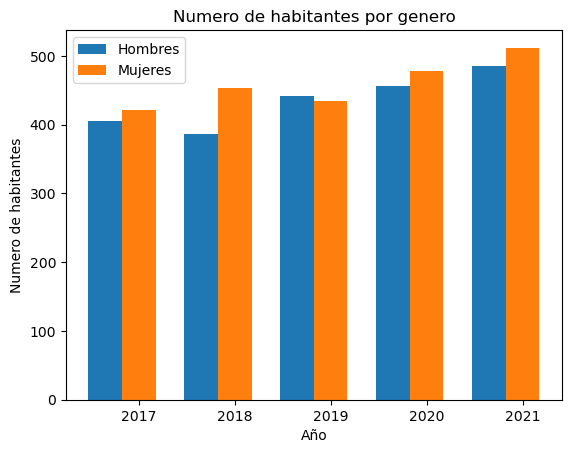

NameError: name 'nu' is not defined

In [113]:
#Ideal para comparar a Inglaterra con USA
serie_1 = [406, 387, 442, 457, 485]
serie_2 = [421, 453, 435, 478, 512]

numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='Hombres')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Mujeres')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('2017', '2018', '2019', '2020','2021'))
 
plt.ylabel('Numero de habitantes')
plt.xlabel('Año')
plt.title('Numero de habitantes por genero')
 
plt.show()
print (nu)

In [ ]:
print (aa, bb, cc, dd, ee, ff, gg)

In [ ]:
data1=[30,20,10,0,0]
data2=[20,20,20,20,0]
data3=[50,60,70,80,100]

year=["2015","2016","2017","2018","2019"]

plt.figure(figsize=(9,7))
plt.bar(year,data3,color="green",label="Python")
plt.bar(year,data2,color="yellow",bottom=np.array(data3),label="JavaScript")
plt.bar(year,data1,color="red",bottom=np.array(data3)+np.array(data2),label="C++")

plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [ ]:
data1=[30,20,10,0,0]
data2=[20,20,20,20,0]
data3=[50,60,70,80,100]

year=["2015","2016","2017","2018","2019"]

fig,ax=plt.subplots(3,1,figsize=(10,8))

ax[0].bar(year,data1,color="red")
ax[0].legend(["C++"])
ax[1].bar(year,data2,color="yellow")
ax[1].legend(["JavaScript"])
ax[2].bar(year,data3,color="green")
ax[2].legend(["Python"])

plt.show()

In [ ]:
map_img_overlay = folium.Map([2,22], zoom_start=3, tiles='CartoDB Positron')

# image to overlay on map
img_overlay = folium.raster_layers.ImageOverlay(name='flags of Africa', 
                                                image='flags_of_africa.png',
                                                # bounds - [[lat_min, lon_min], [lat_max, lon_max]]
                                                bounds=[[-38, -28], [40, 60]],
                                                opacity=0.5)
# add image to map
img_overlay.add_to(map_img_overlay)

# layer control to click layer on or off
folium.LayerControl().add_to(map_img_overlay)

# display map
map_img_overlay